In [1]:
%load_ext autoreload

In [2]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import build_dataset
import dataframe_exploration

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
appended
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [3]:
wt_instance = build_dataset.wt_data.load_instance("WTG04",load_minimal=False)



Loading WTG04...
Loaded WTG04


In [5]:
# ----- Used to create and build a csv file of the data set -----


df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=2500,plot=False, bins=50, 
                                                         plot_vertical_lines=False)

build_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_power>2500_WTG04.csv')


../data_processing/ff_transform.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  amp = fft_modulus_norm[filter_indexes]


294 / 430 intervals added to dataframe
Saved GbxHssRr_RMS_power>2500_WTG04.csv.


### Correlation plot, unfiltered data set

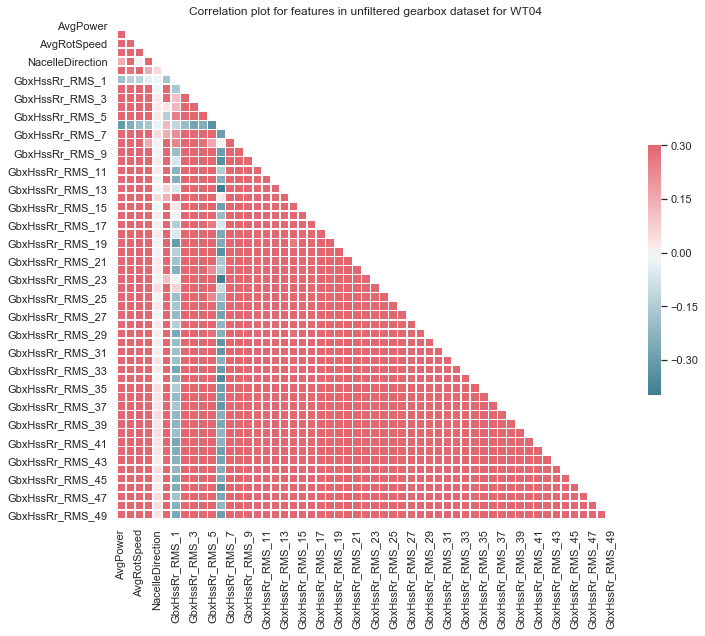

In [6]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG04.csv'
save_to_file_name = "Correlation_plot_wtg04_Gearbox"
plot_title = "Correlation plot for features in unfiltered gearbox dataset for WT04"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

### Correlation plot, filtered data set

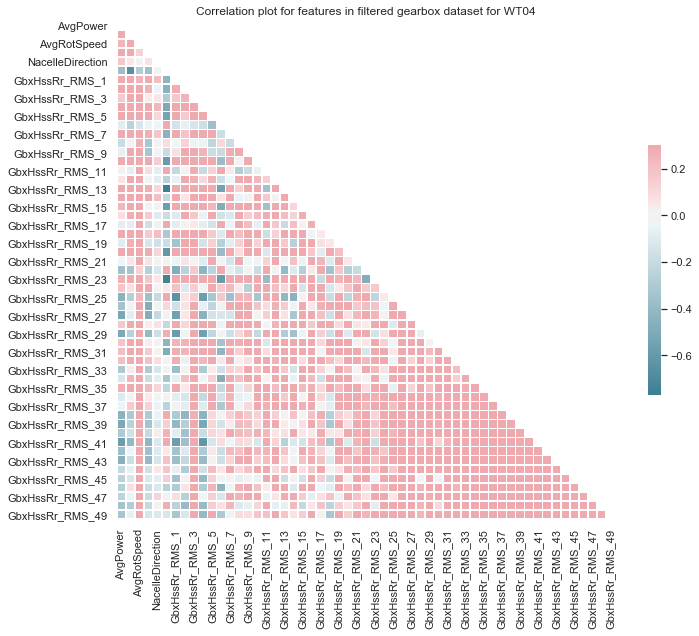

In [7]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG04.csv'
save_to_file_name = "Correlation_plot_wtg04_Gearbox"
plot_title = "Correlation plot for features in filtered gearbox dataset for WT04"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

### Load data set from csv file

In [8]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG04.csv'
data = pd.read_csv(path)
data.head()

AvgPower     ActPower  AvgRotSpeed  WindSpeed  NacelleDirection  \
0  2697.461426  2332.100098  1456.464986        9.1        256.100006   
1  2606.151855  2843.500000  1468.503663       10.0        240.199997   
2  2541.849854  2694.100098  1458.875183       10.5         71.099998   
3  2853.304199  3293.399902  1460.635409       12.7        269.399994   
4  2752.077881  3040.300049  1490.140485        9.7        143.899994   

   GbxHssRr_RMS_0  GbxHssRr_RMS_1  GbxHssRr_RMS_2  GbxHssRr_RMS_3  \
0        0.605830        0.277058        0.996900        0.689766   
1        0.442596        0.282496        1.084843        0.693390   
2        0.460147        0.283354        1.046884        0.696663   
3        0.588372        0.316541        1.206630        0.698068   
4        0.331396        0.348790        1.006552        0.714951   

   GbxHssRr_RMS_4  ...  GbxHssRr_RMS_40  GbxHssRr_RMS_41  GbxHssRr_RMS_42  \
0        0.923950  ...         2.171177         3.341845         3.663157   
1        1.264460  ...         2.039660         3.046168         3.636969   
2        1.018815  ...         2.060718         3.112262         3.504307   
3        2.052702  ...         1.702469         2.535753         3.047870   
4        1.713384  ...         2.350086         2.814870         3.814341   

   GbxHssRr_RMS_43  GbxHssRr_RMS_44  GbxHssRr_RMS_45  GbxHssRr_RMS_46  \
0         4.913300         5.802759         4.361064         2.580111   
1         4.619950         5.445951         4.051958         2.633907   
2         4.657672         5.576142         4.266043         2.535672   
3         3.885583         4.796940         3.918596         2.244258   
4         4.977600         5.717045         3.786884         2.446647   

   GbxHssRr_RMS_47  GbxHssRr_RMS_48  GbxHssRr_RMS_49  
0         1.596336         0.926396         0.505926  
1         1.496696         0.788367         0.524455  
2         1.446258         0.818848         0.524562  
3         1.127504         0.706284         0.429935  
4         1.797222         0.831942         0.469478  

[5 rows x 55 columns]

## Plot average rot speed (high speed shaft) for all intervals with avg_power > 2500

color codes: 
red: hgih rot speed which gives high rms values in bin 5

yellow: low rot speeds which gives high rms values in bin 1,2 or 3. The first line at interval 30 (with very low 
rot speed) has only high rot speed in bin 1

light blue: high rot speed but regular rms values

green horisontal line: 1550 rpm (rotational speed)

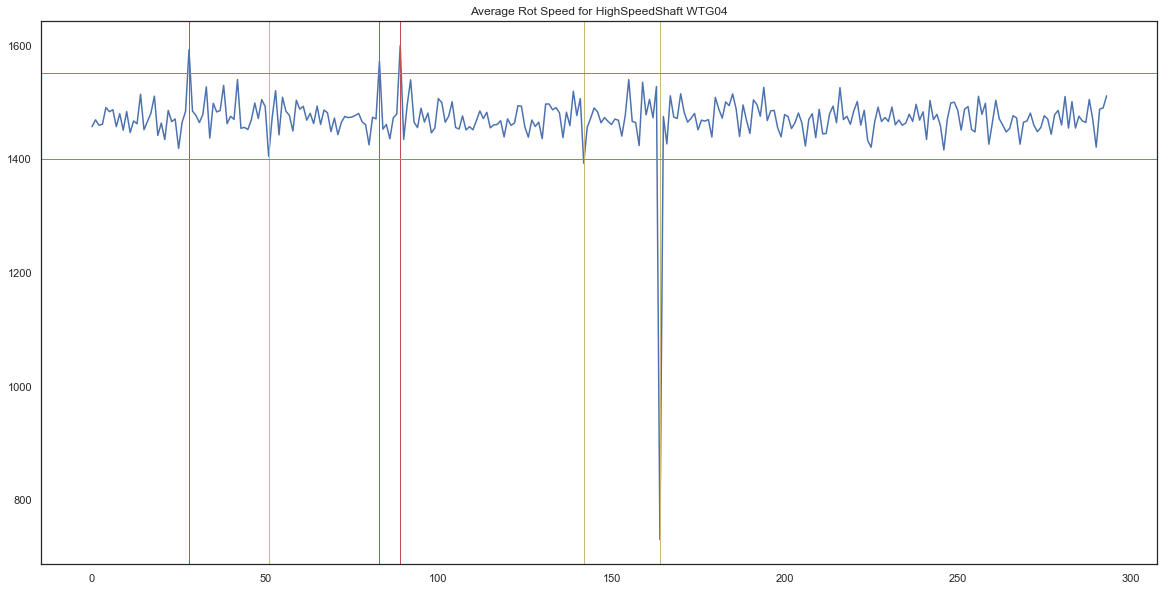

In [19]:
x = np.arange(data.shape[0])
y = data['AvgRotSpeed']
plt.figure(figsize=(20,10))
plt.title('Average Rot Speed for HighSpeedShaft WTG04')
plt.plot(x, y)
plt.axvline(x=28,  c='r', linewidth=1)
plt.axvline(x=83,  c='r', linewidth=1)
plt.axvline(x=89,  c='r', linewidth=1)

plt.axvline(x=51, c='y', linewidth=1)
plt.axvline(x=142, c='y', linewidth=1)
plt.axvline(x=164, c='y', linewidth=1)
plt.axhline(y=1400, c='g', linewidth=1)
plt.axhline(y=1550, c='g', linewidth=1)
plt.show()

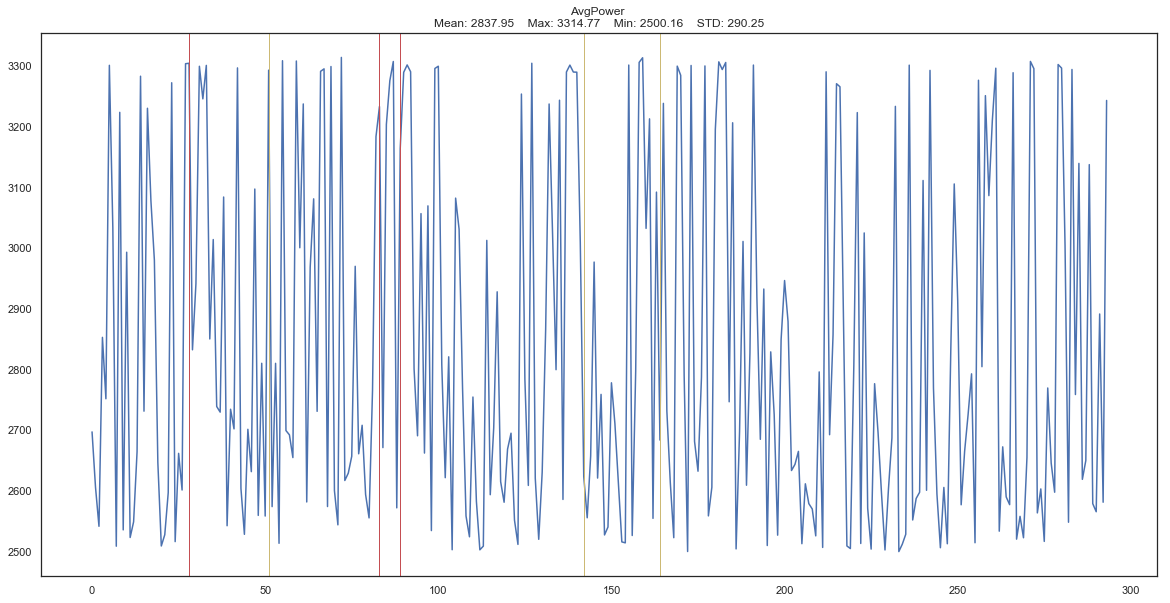

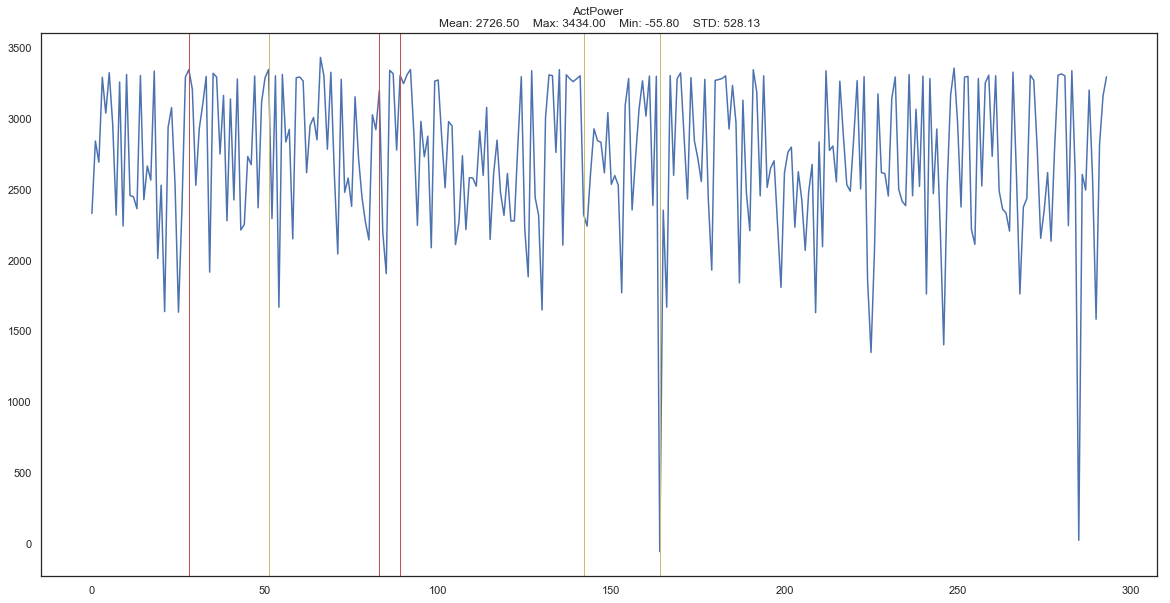

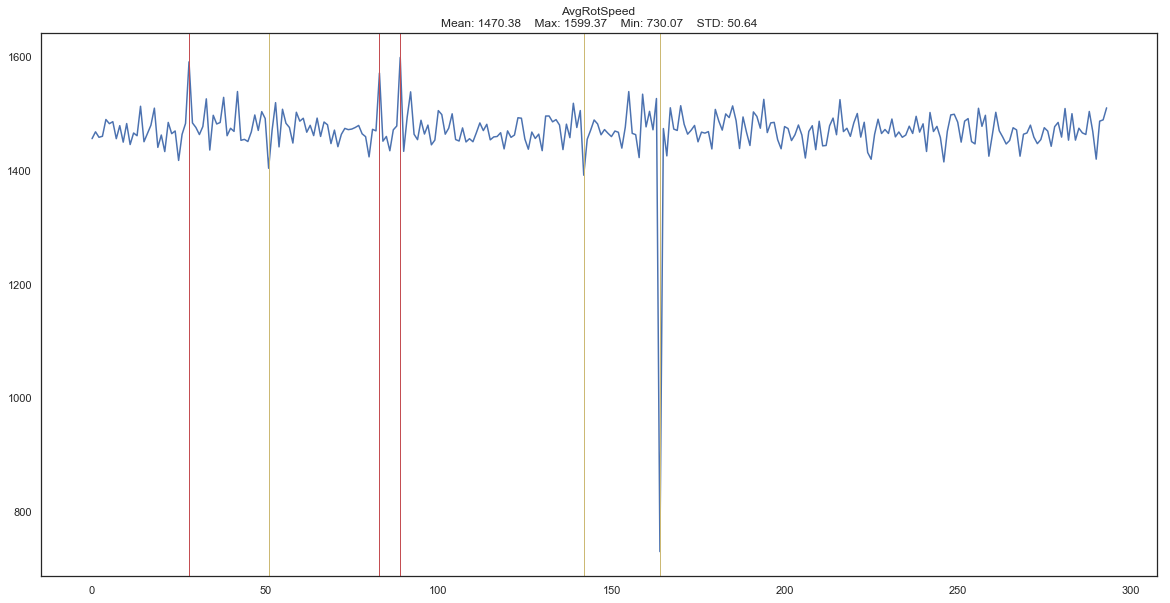

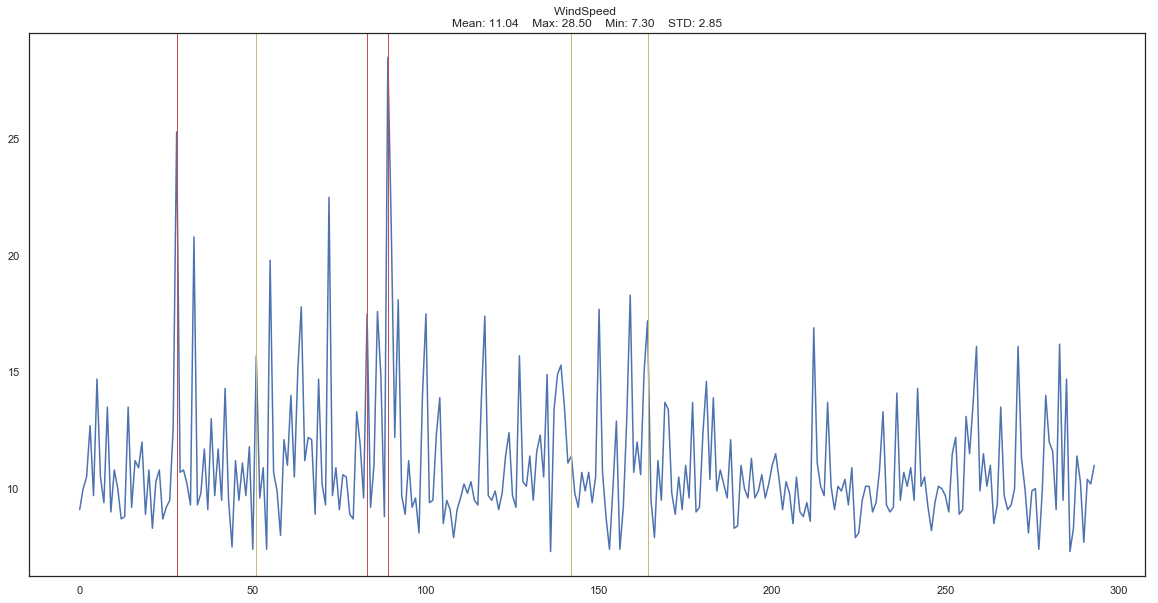

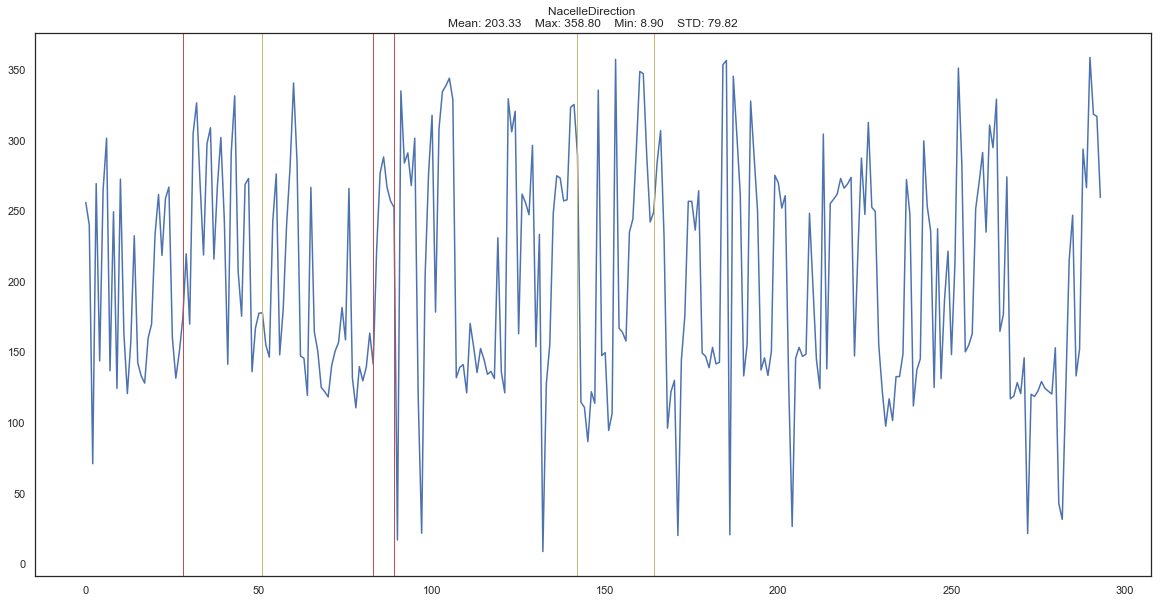

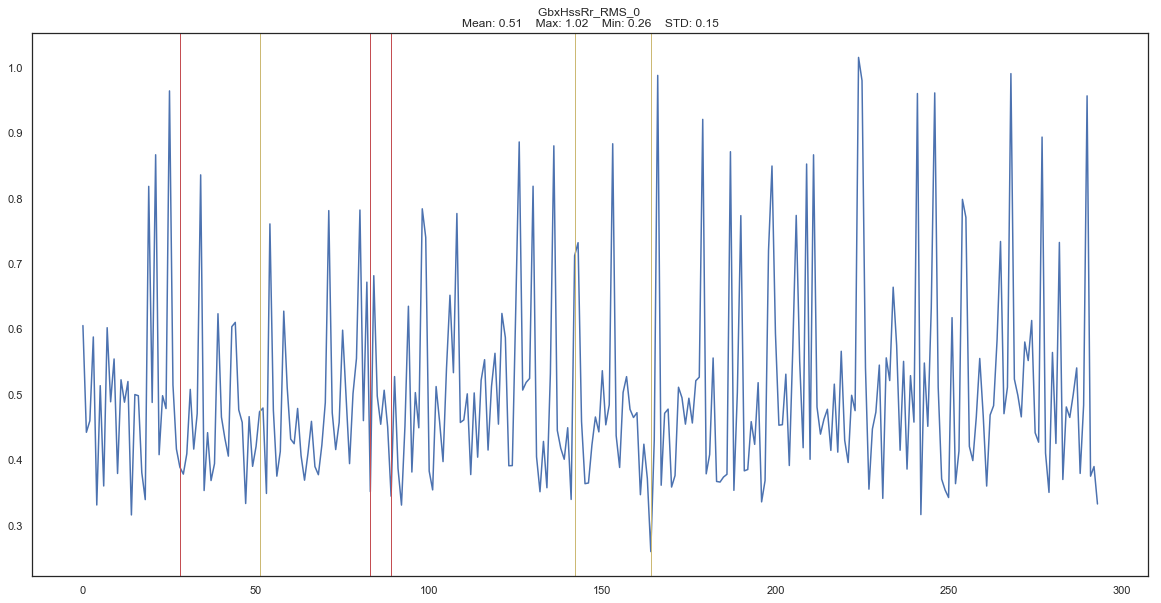

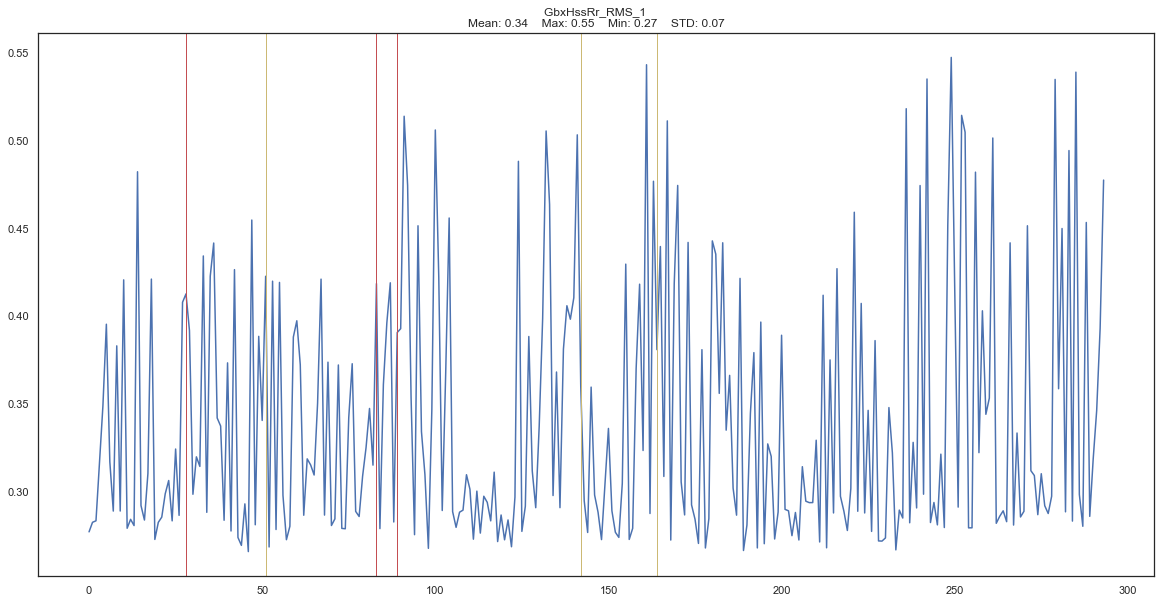

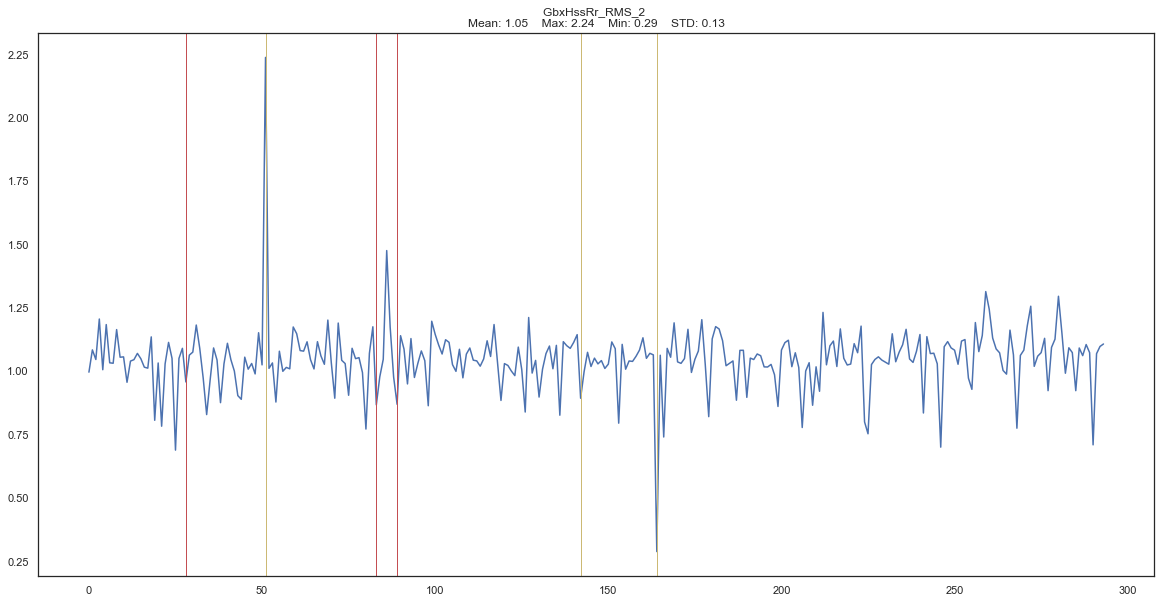

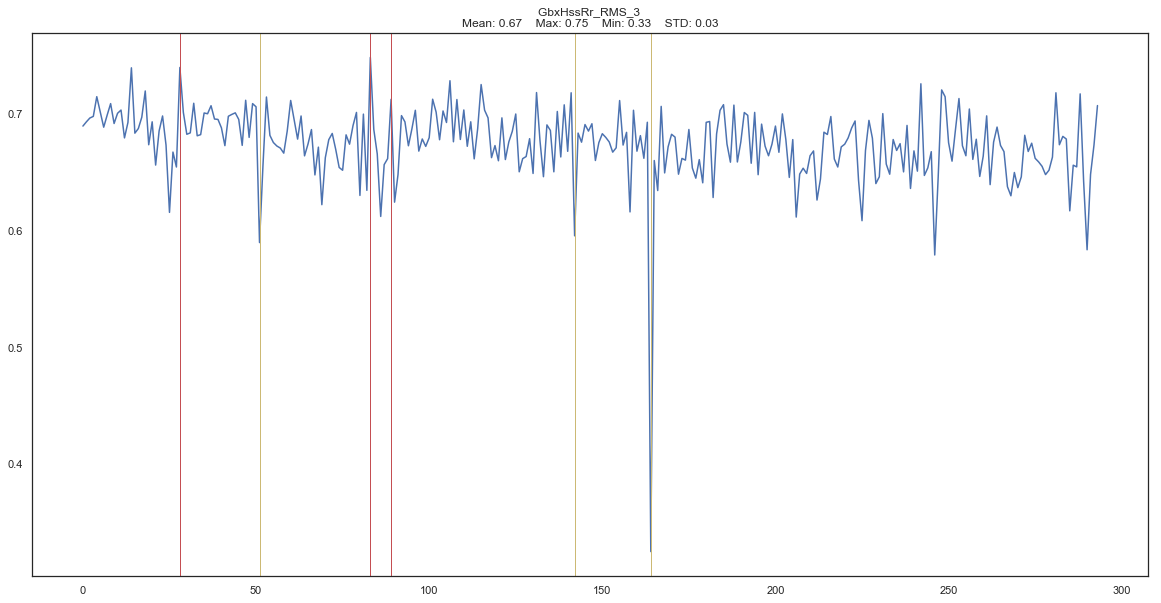

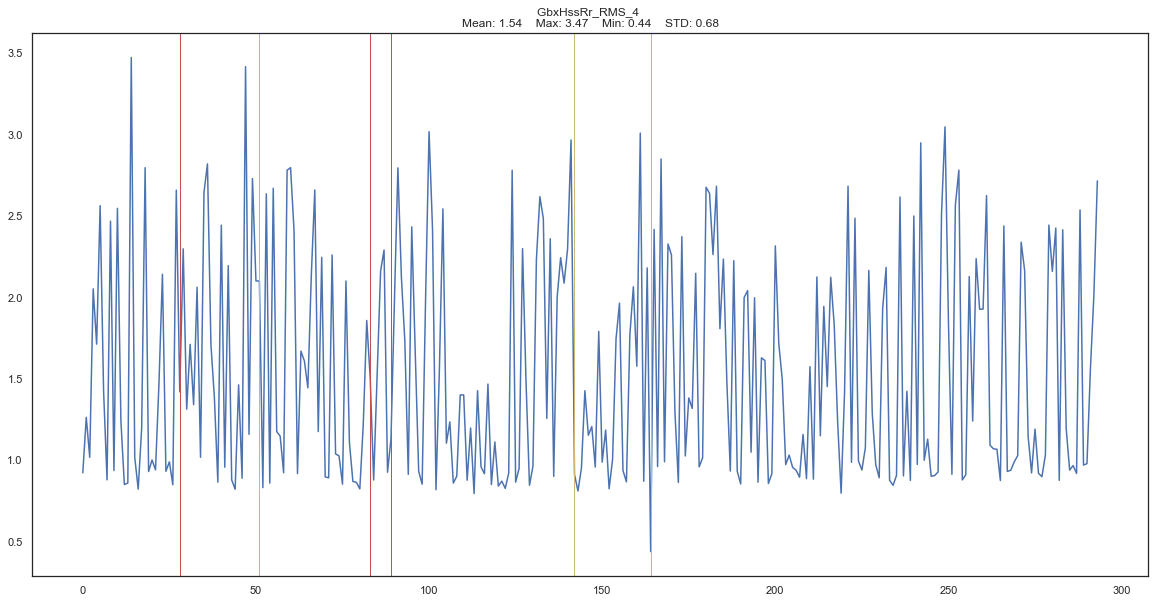

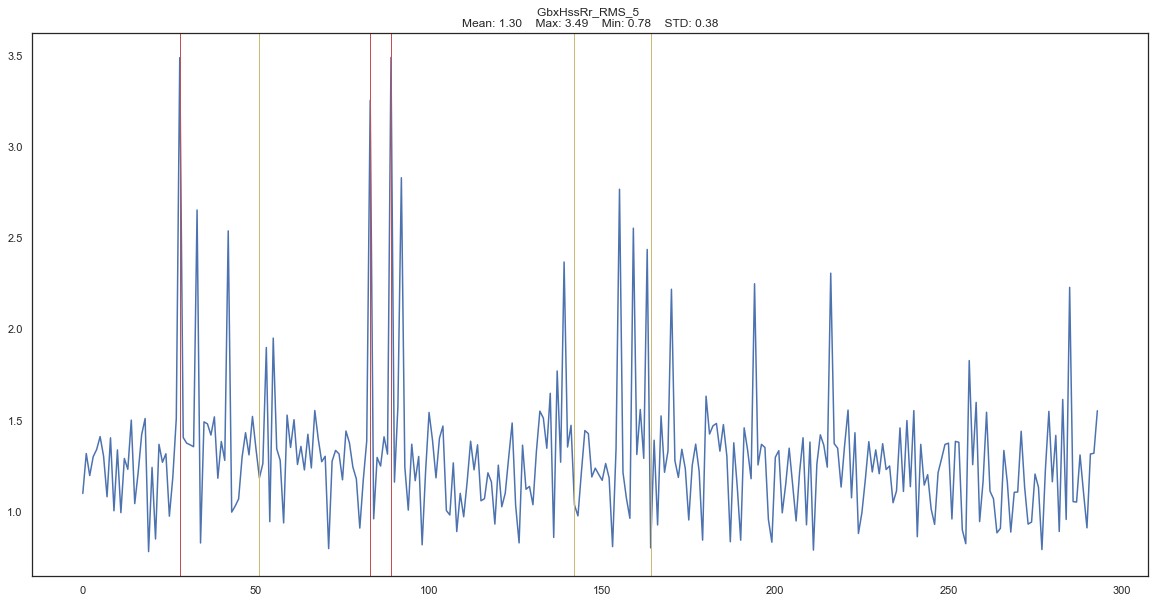

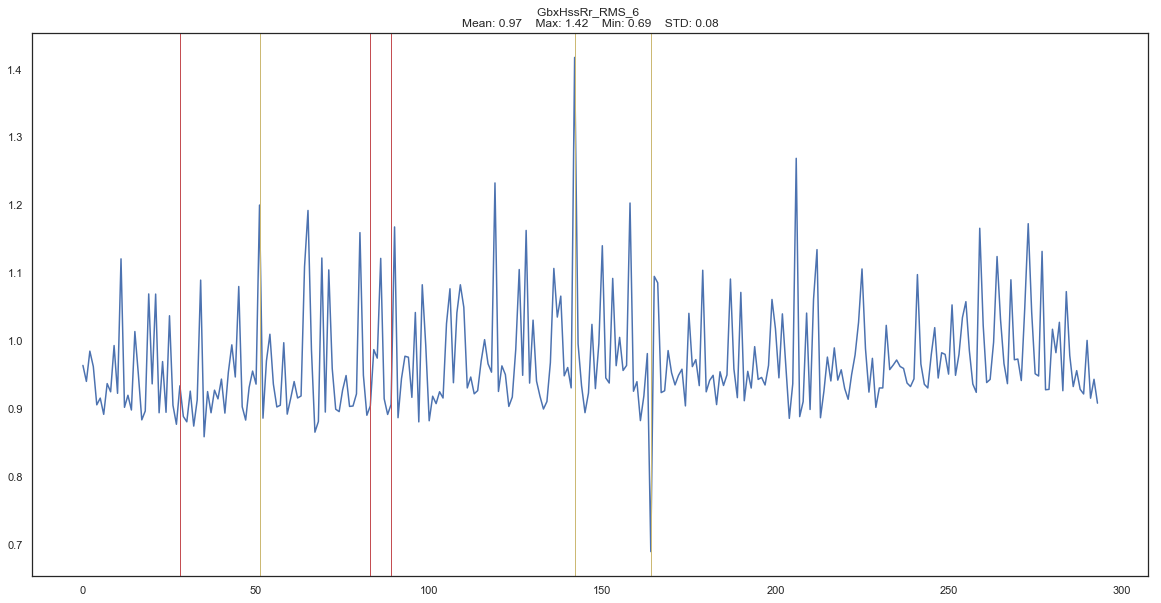

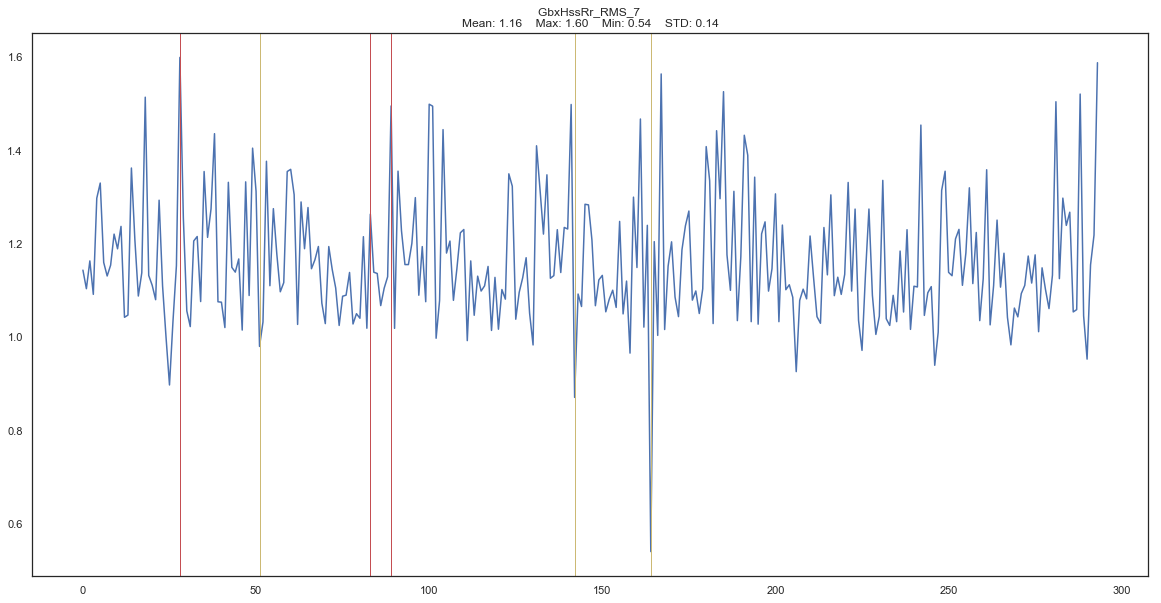

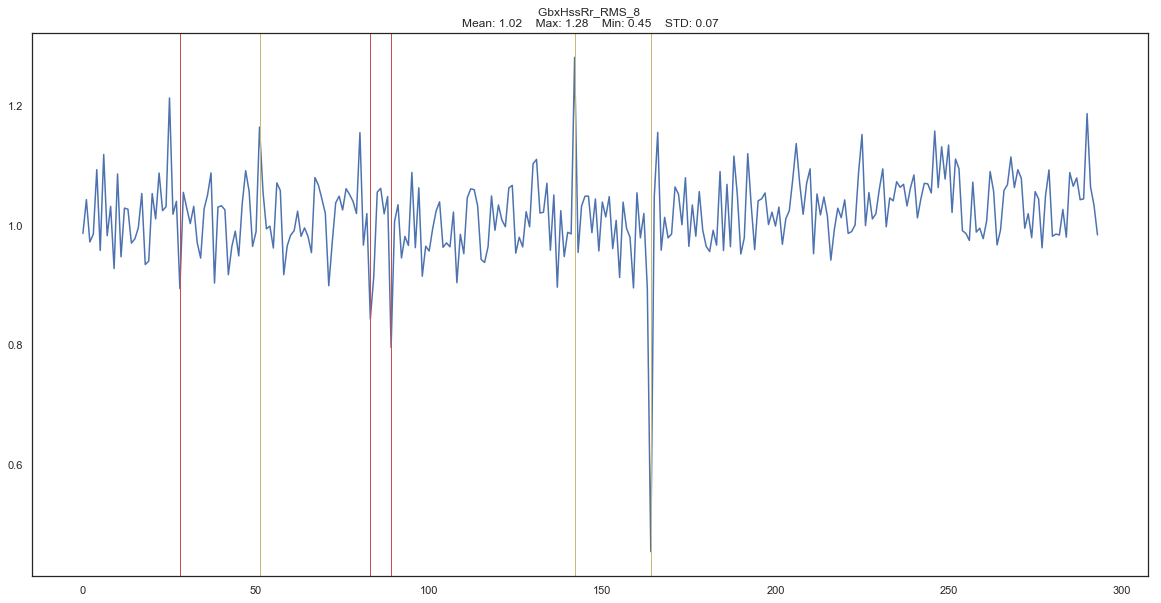

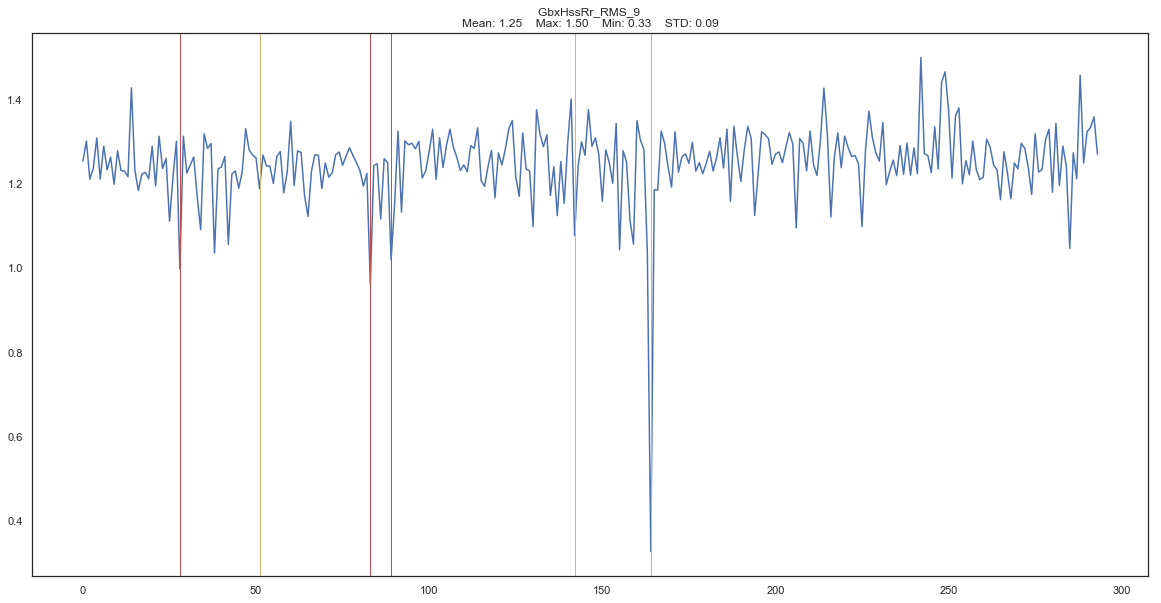

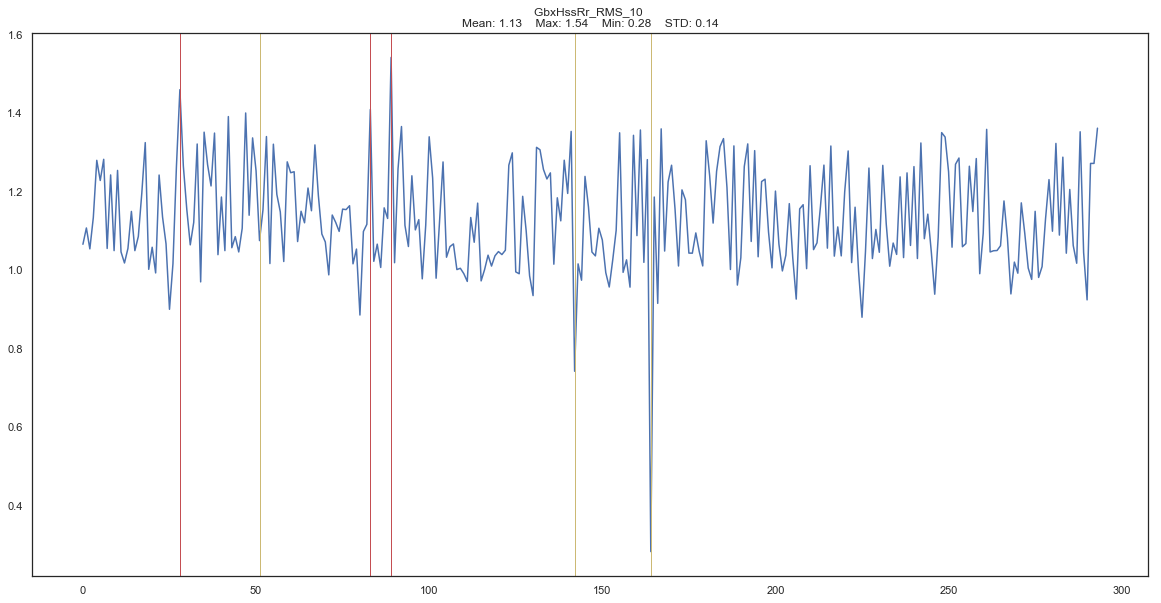

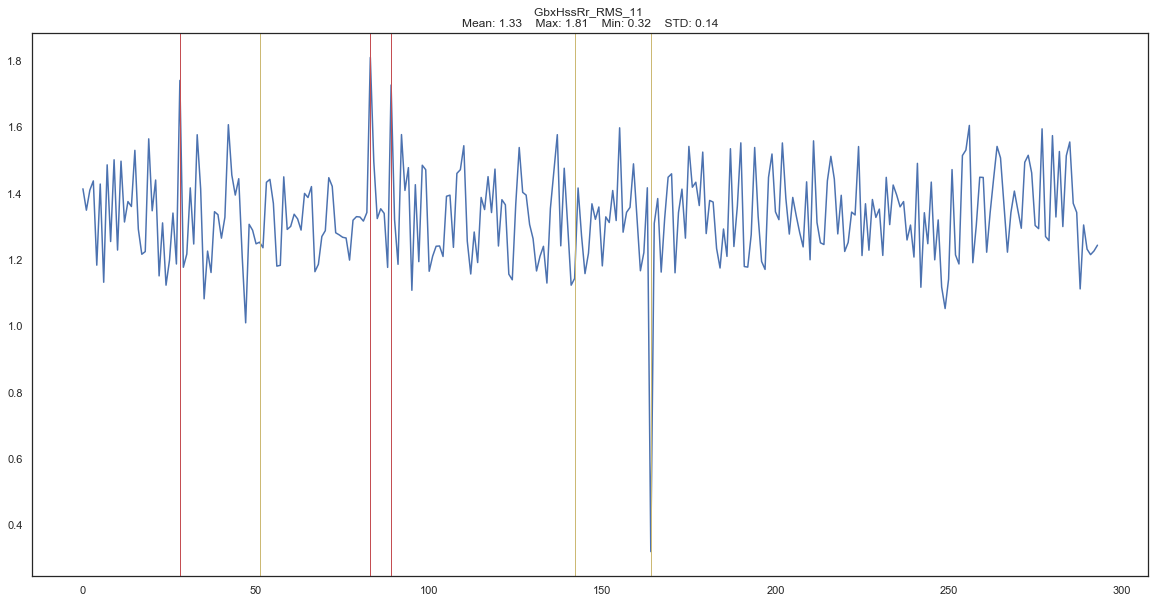

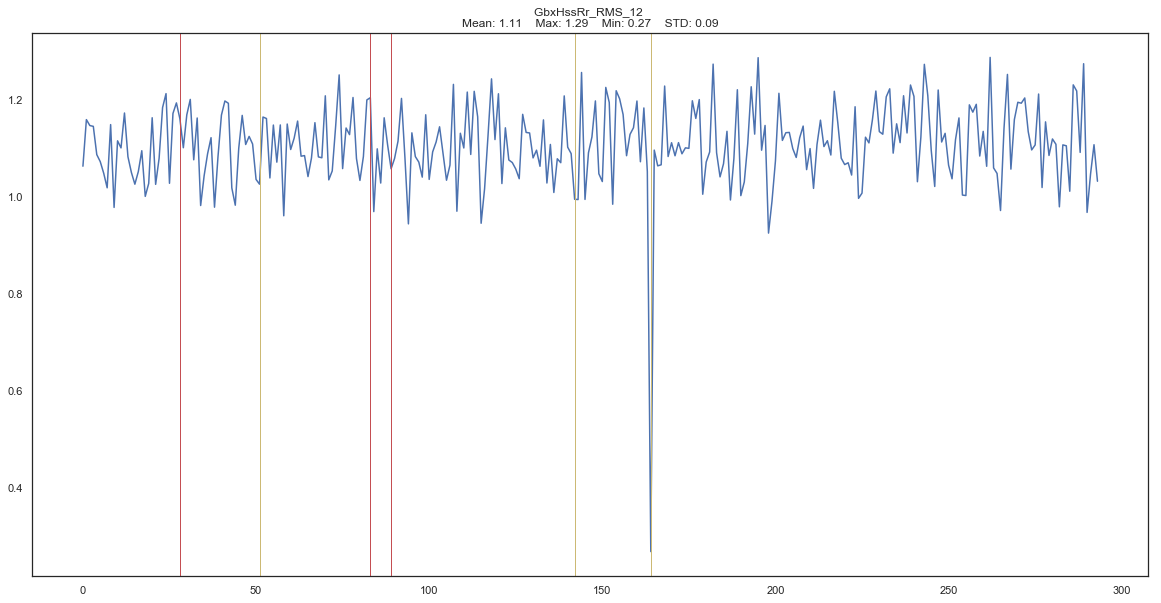

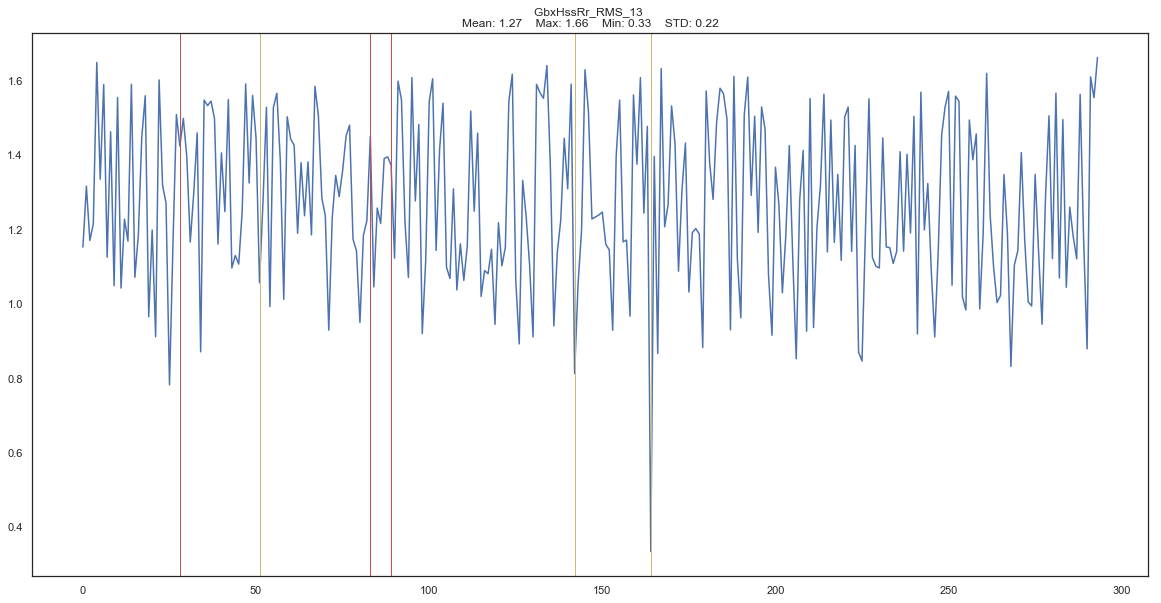

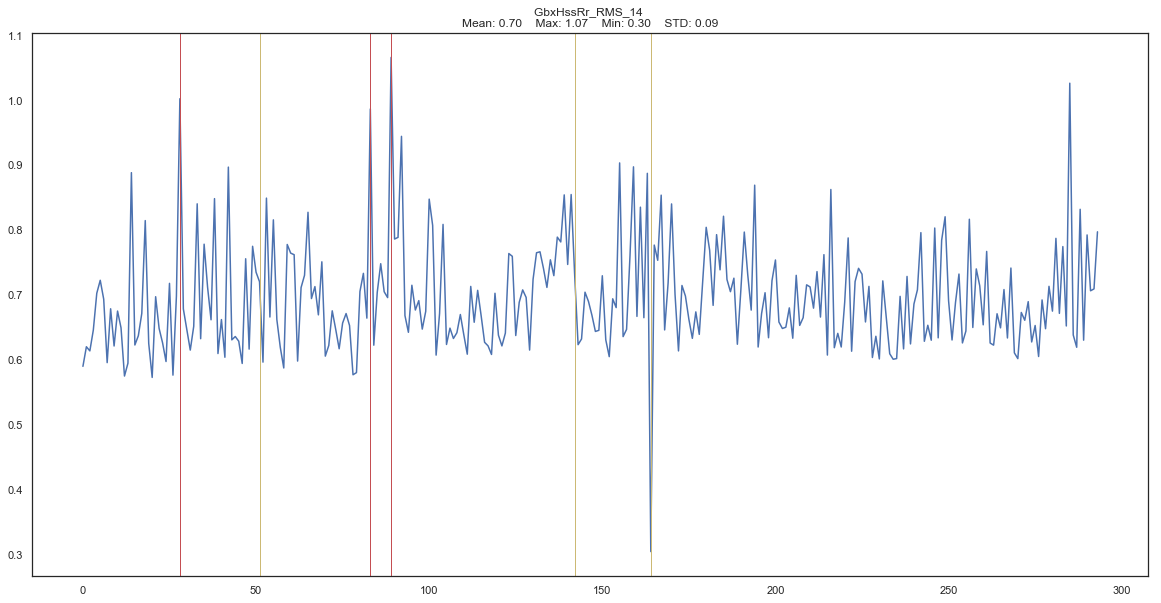

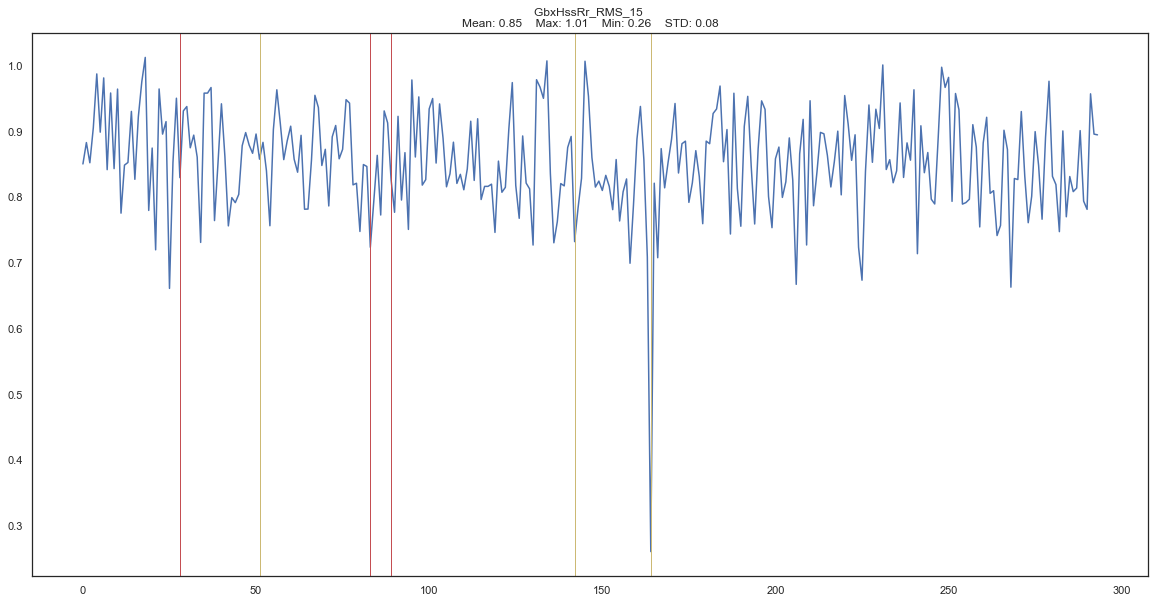

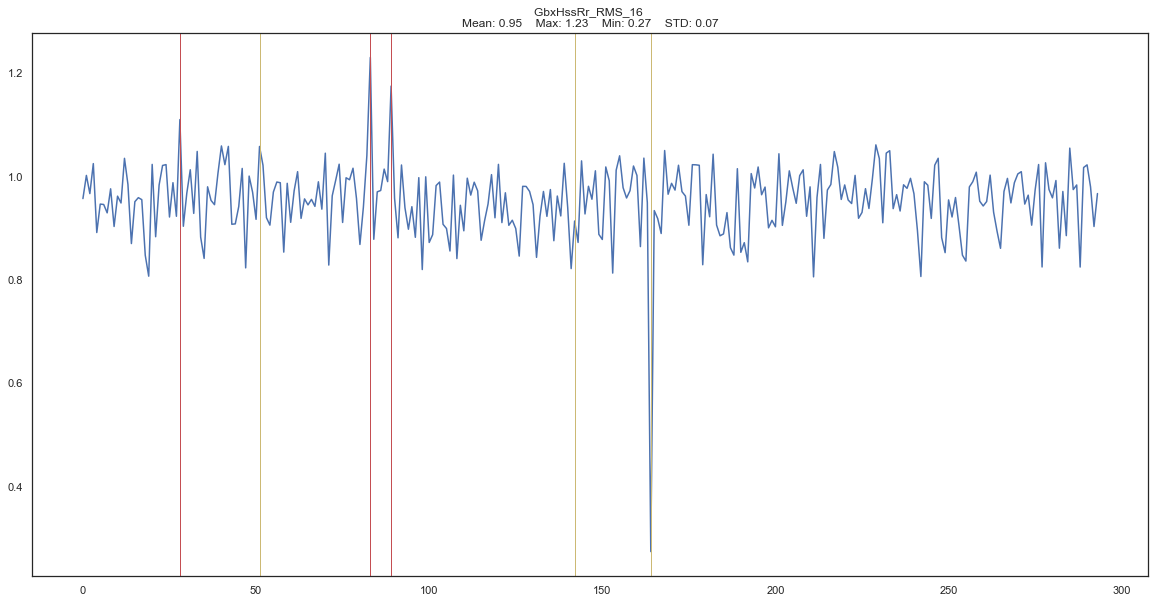

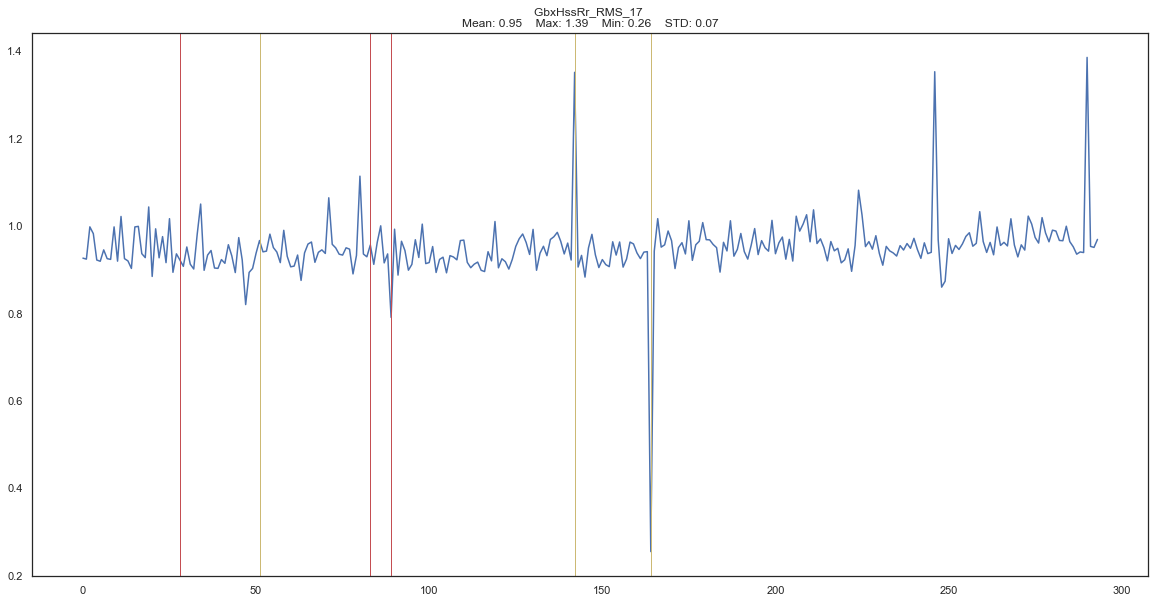

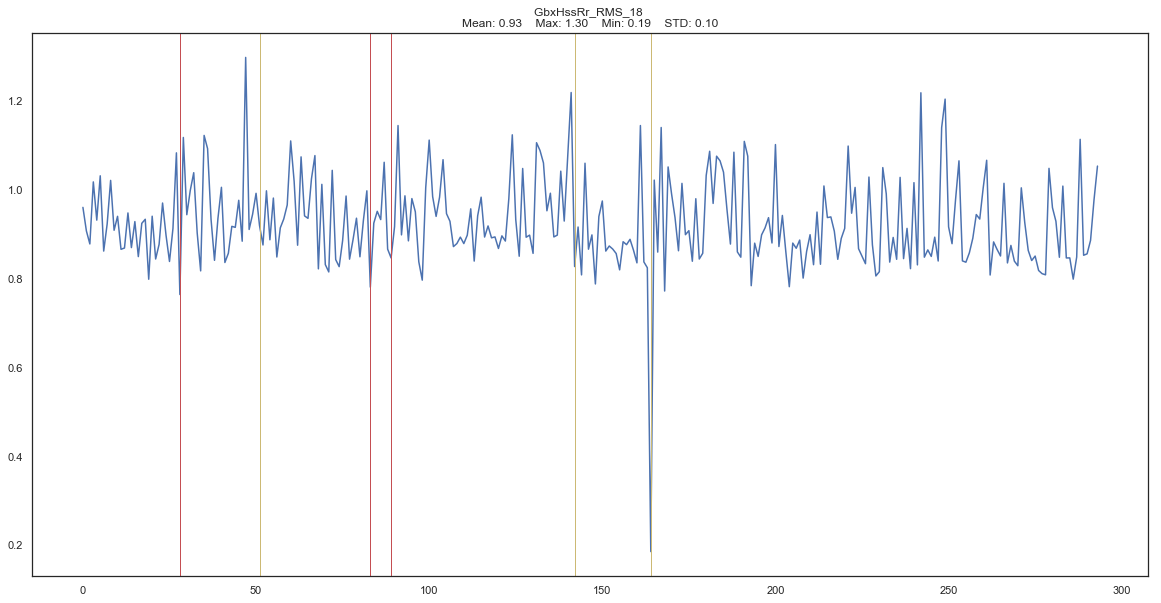

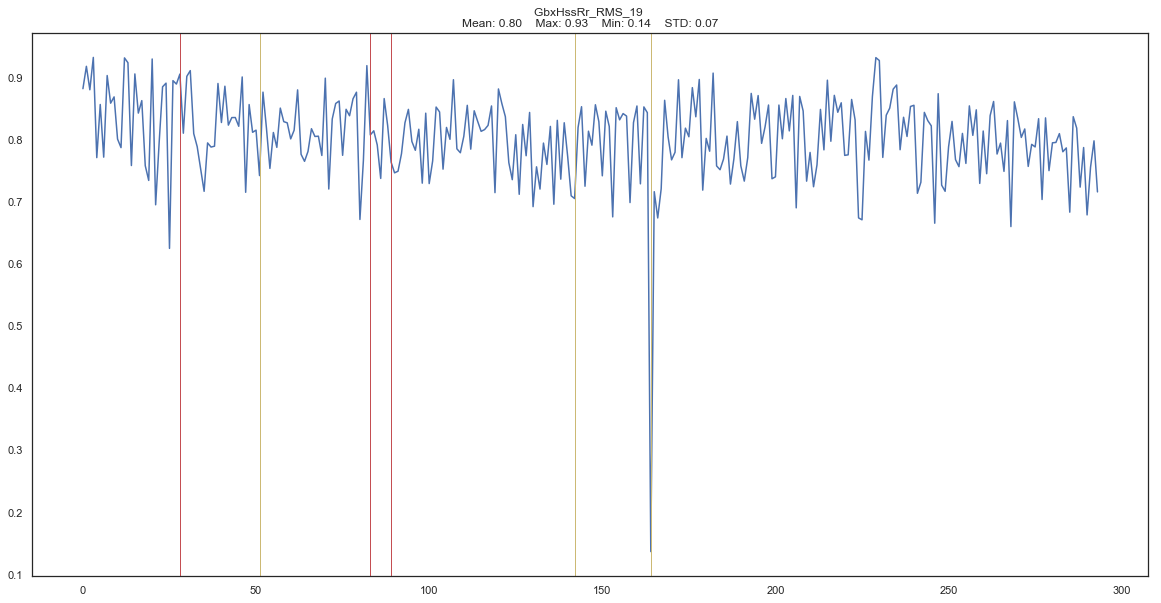

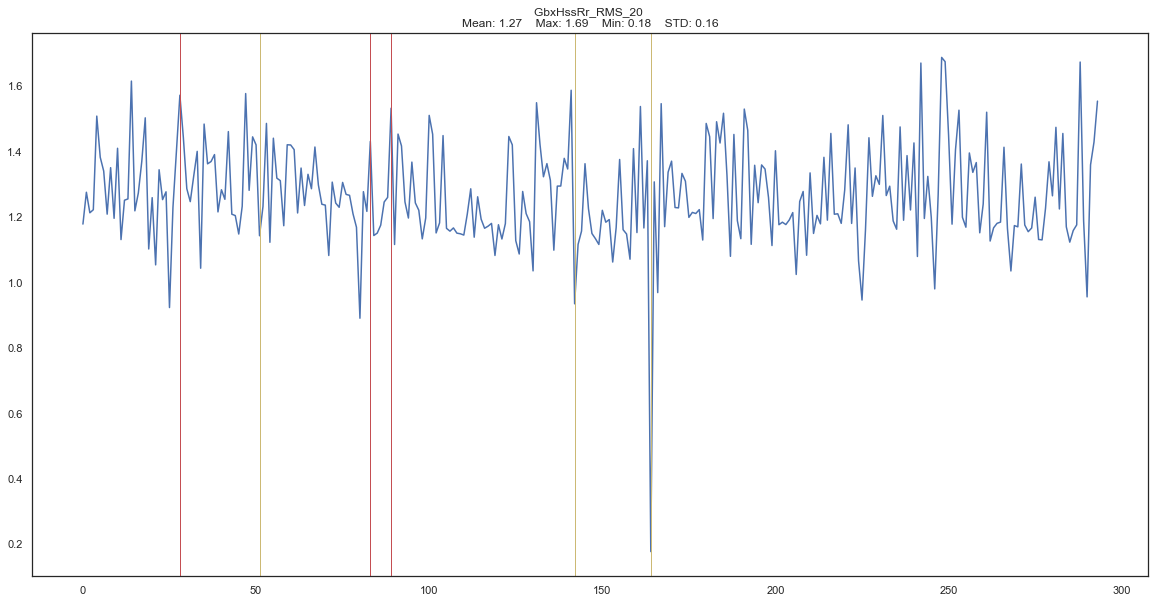

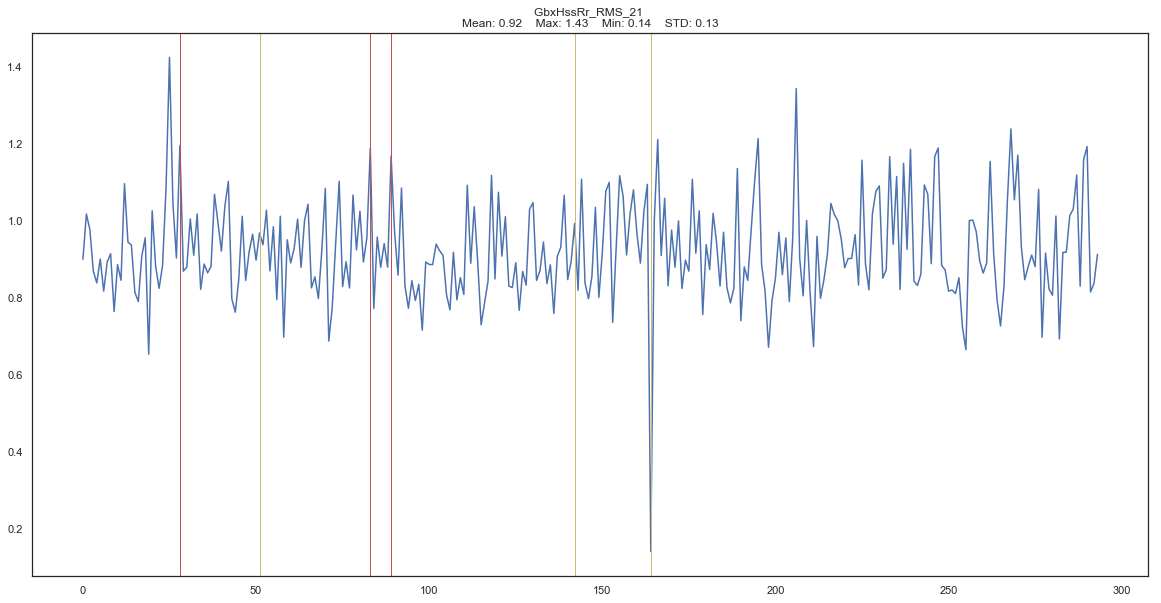

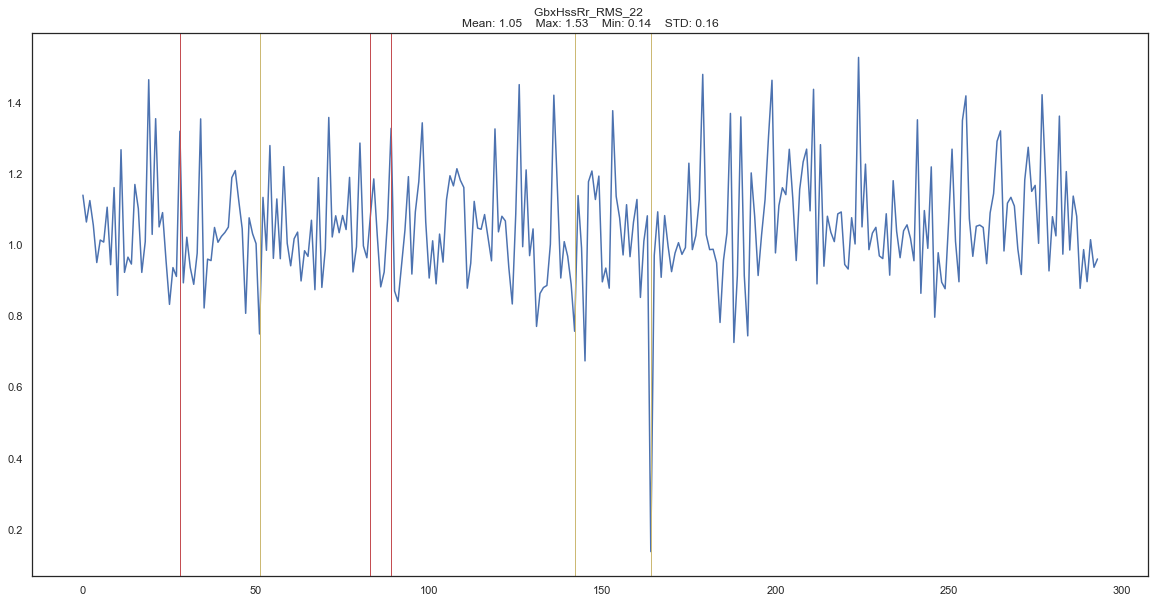

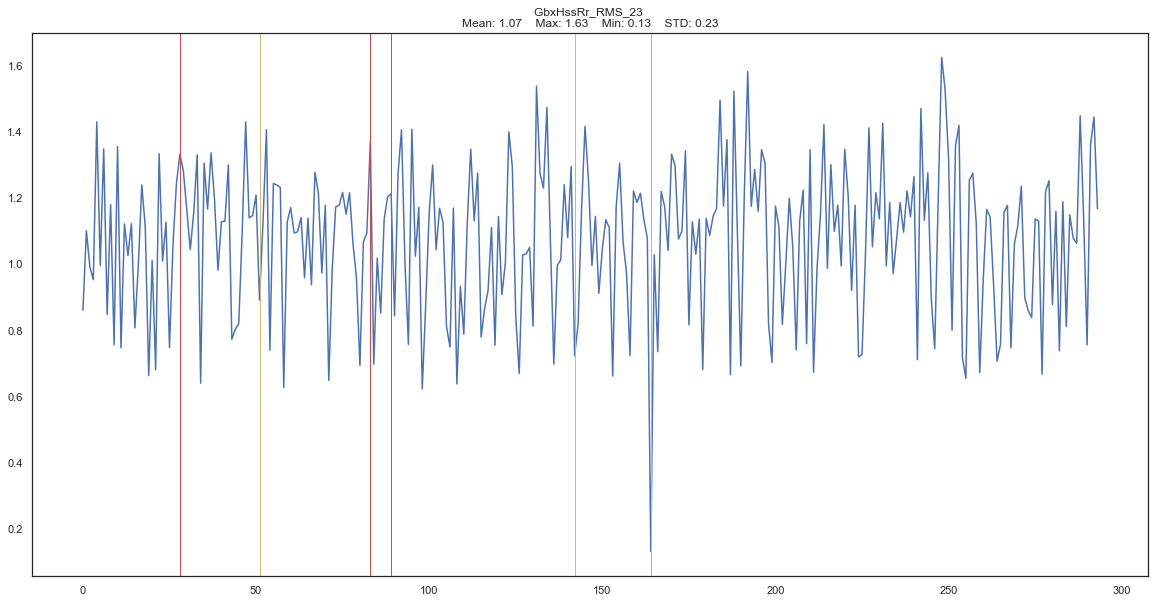

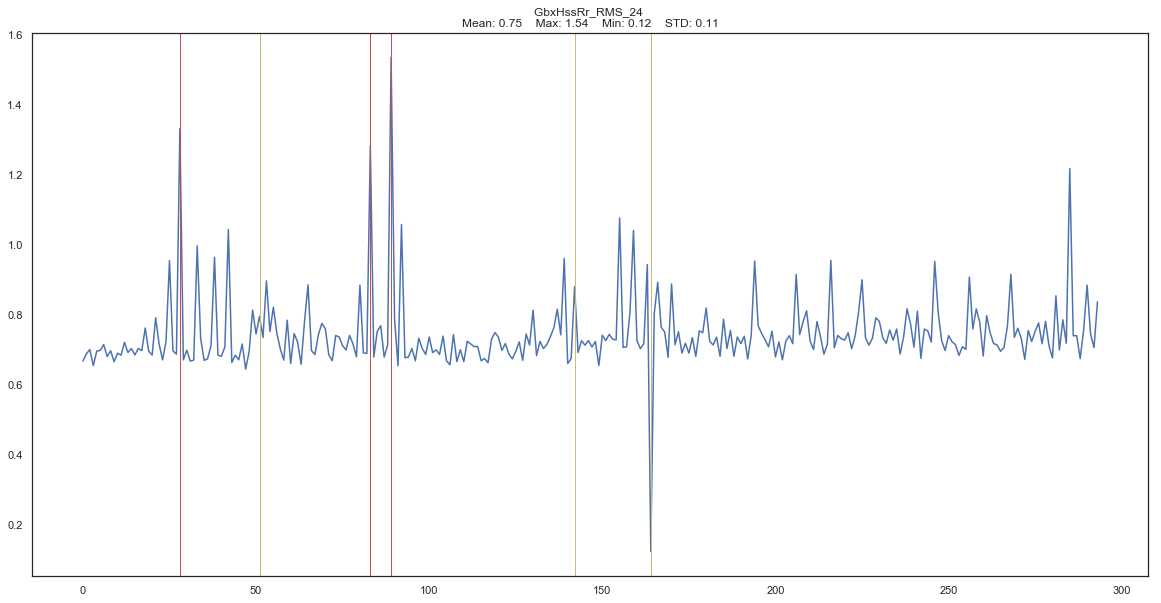

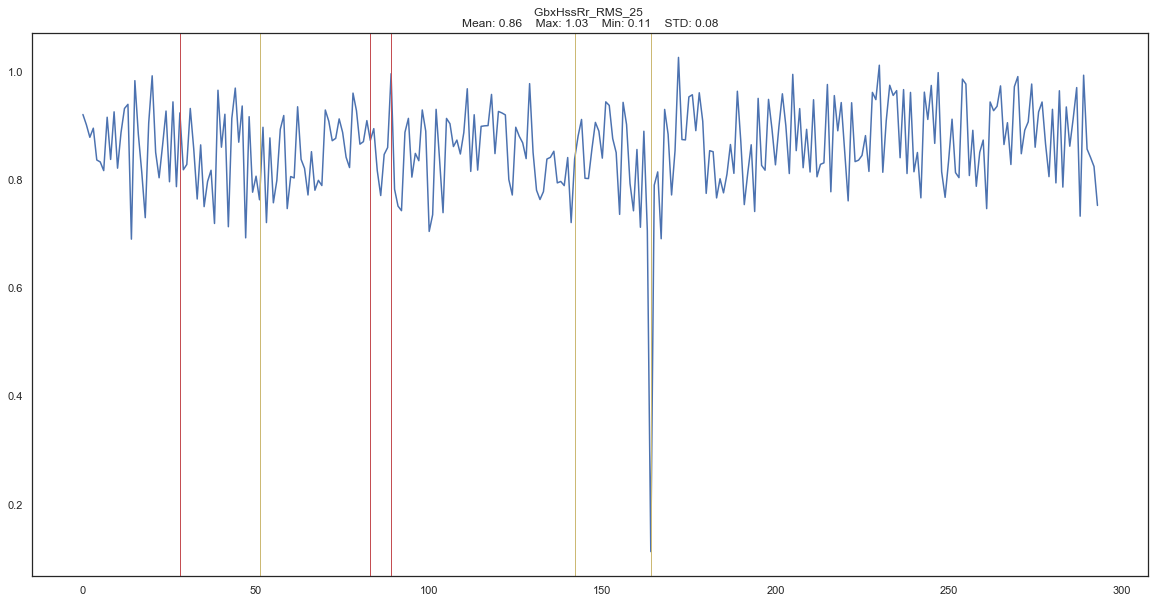

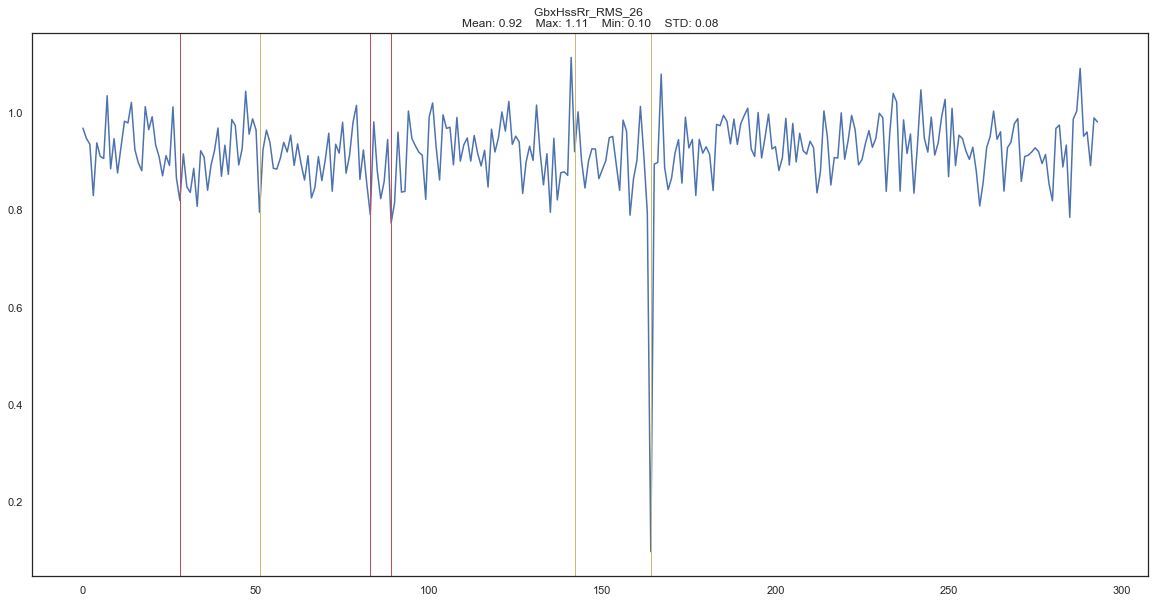

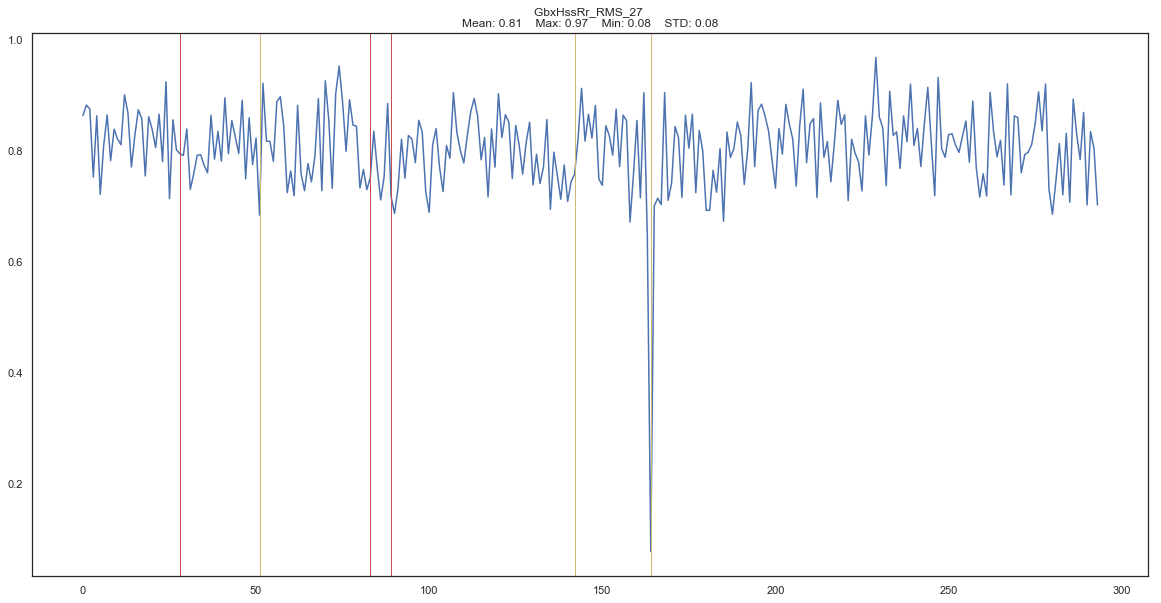

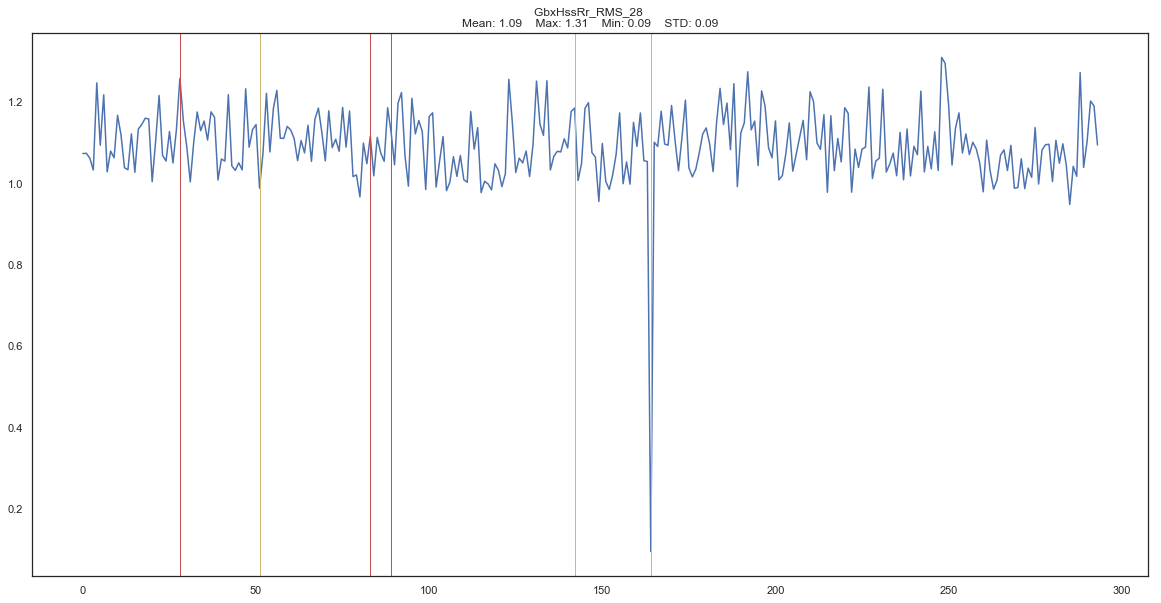

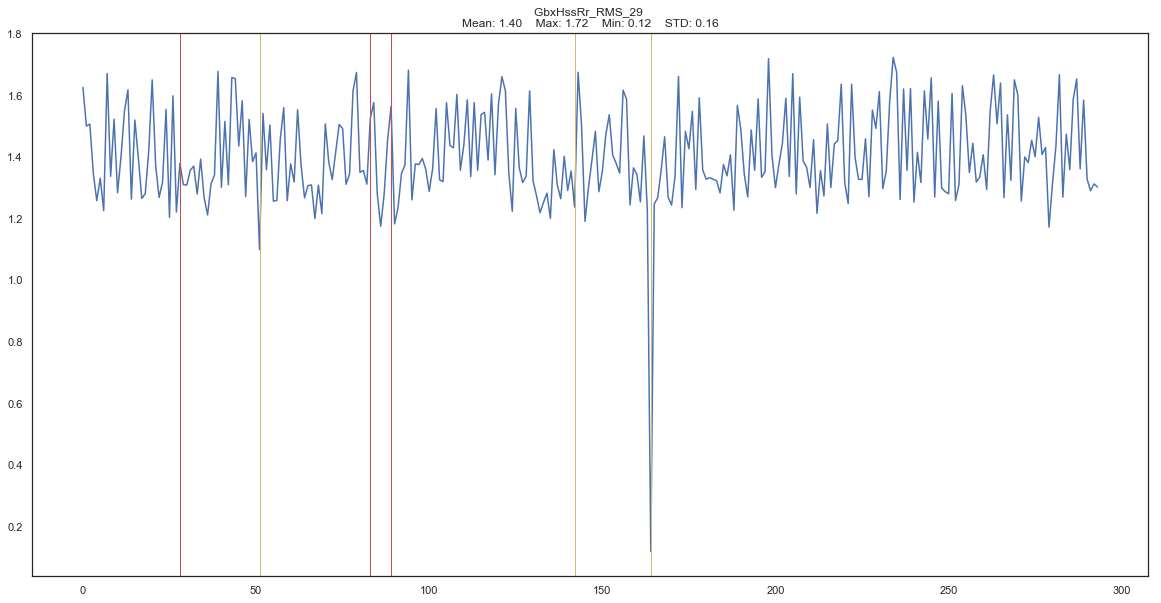

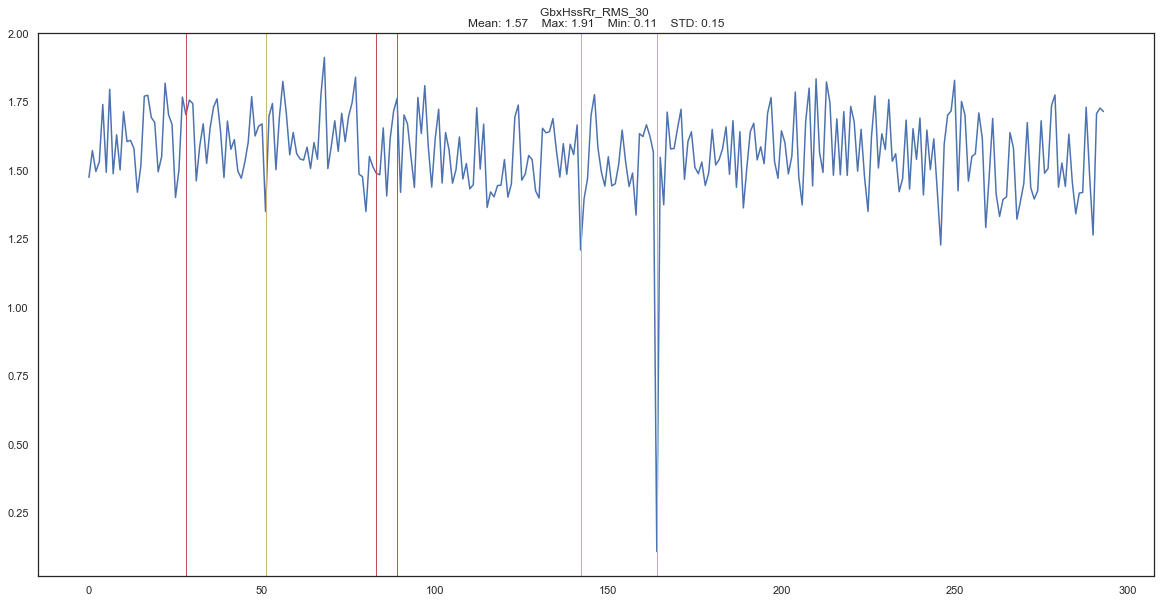

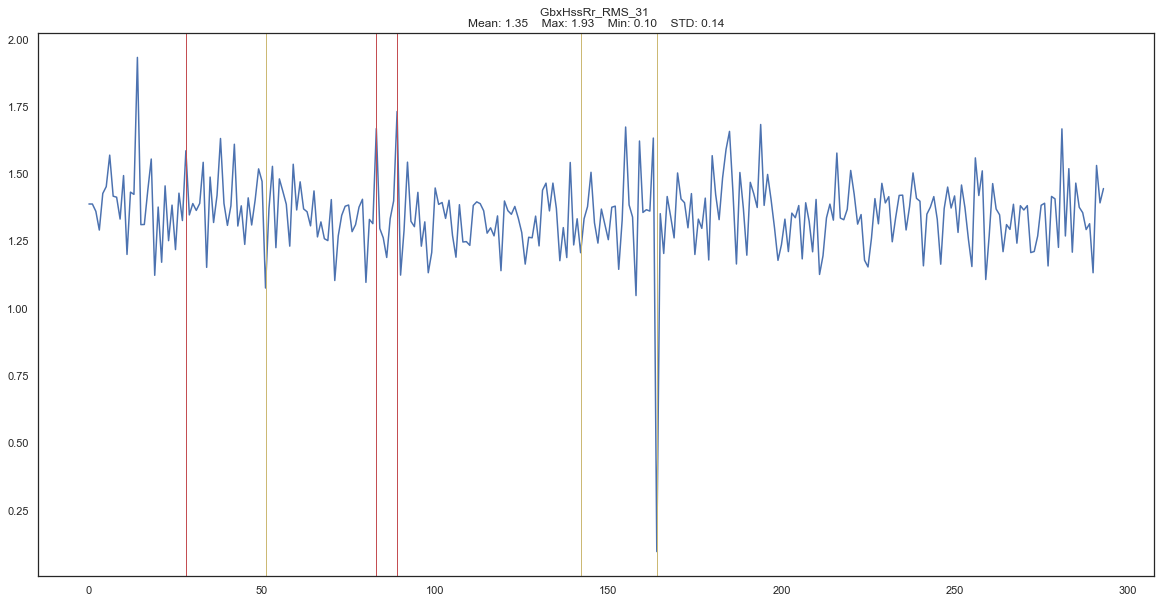

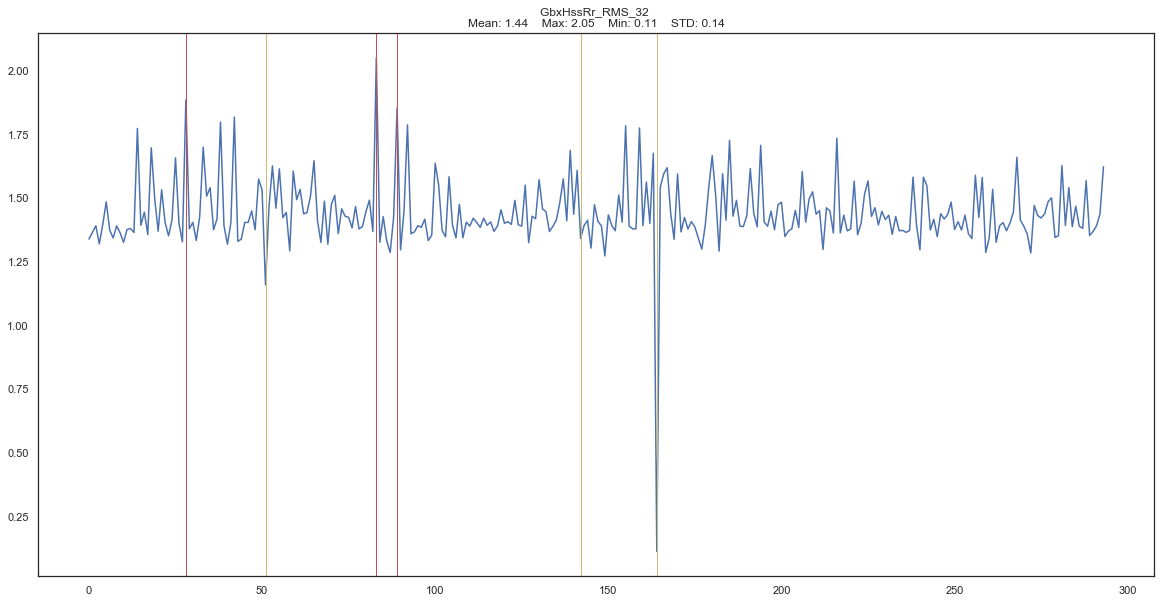

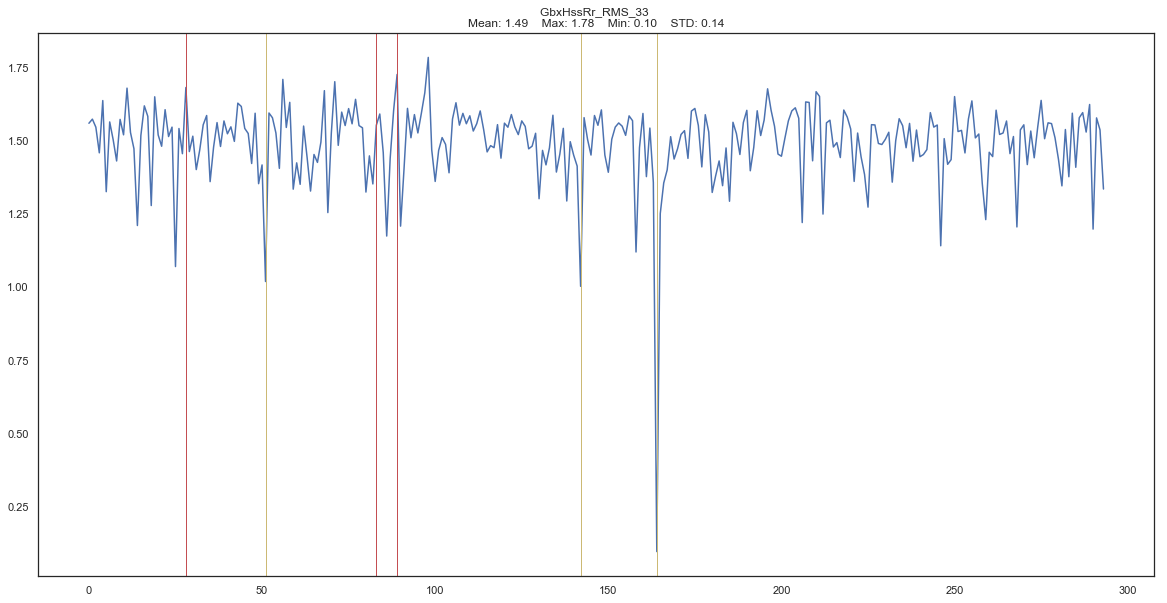

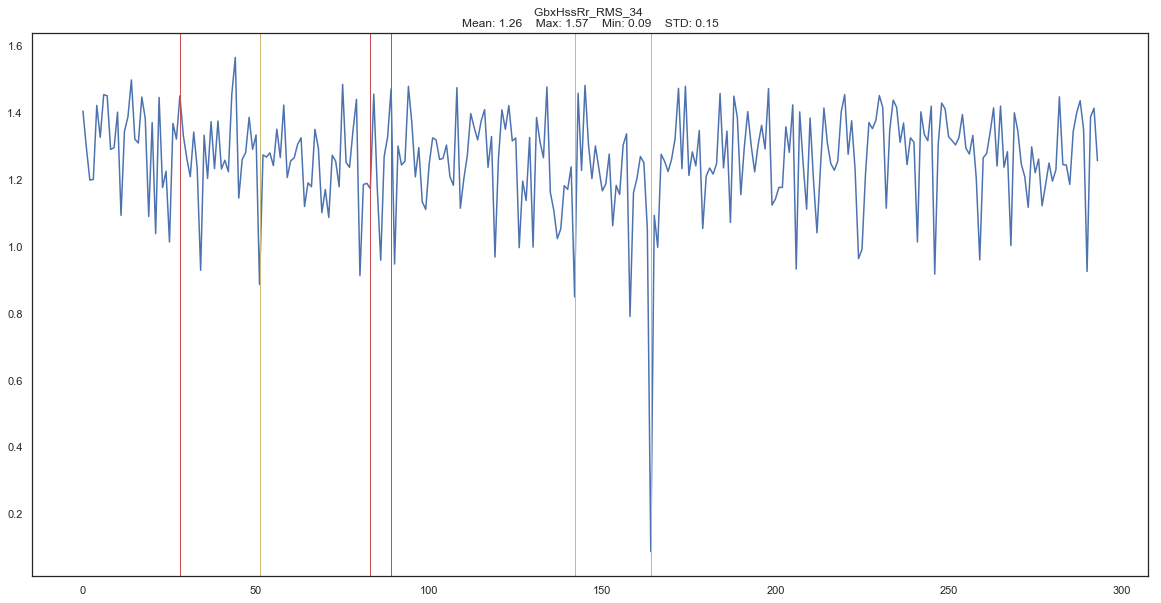

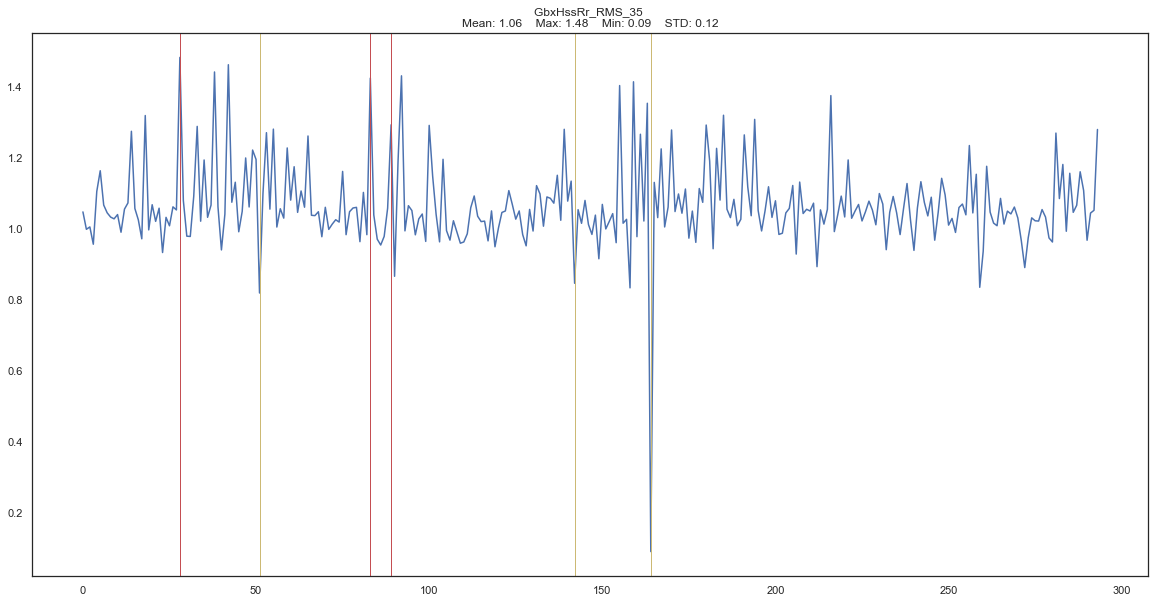

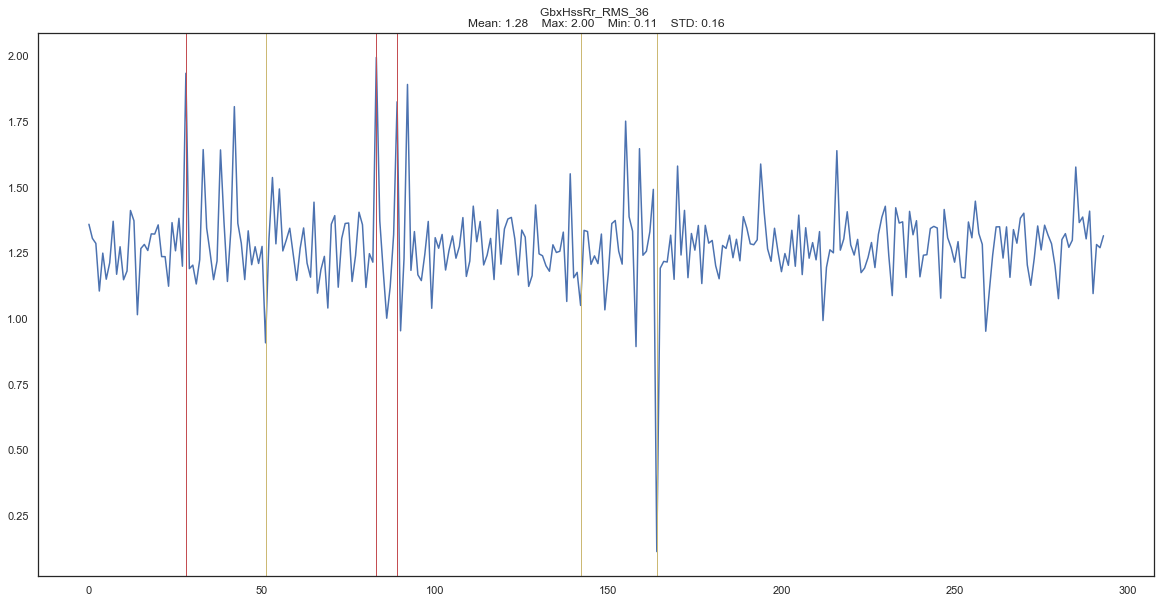

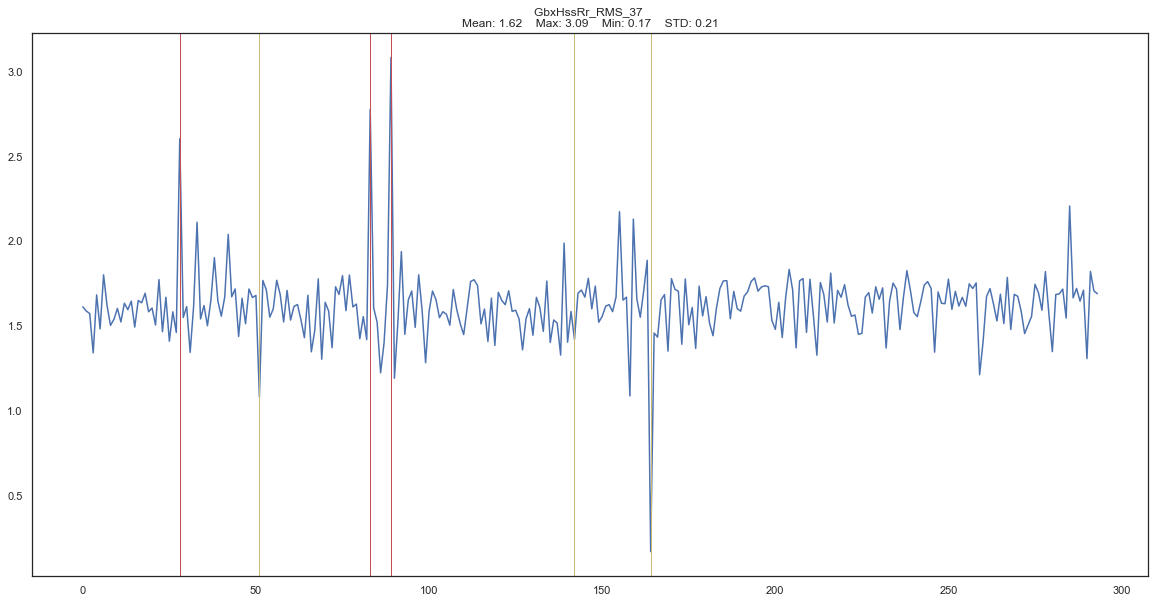

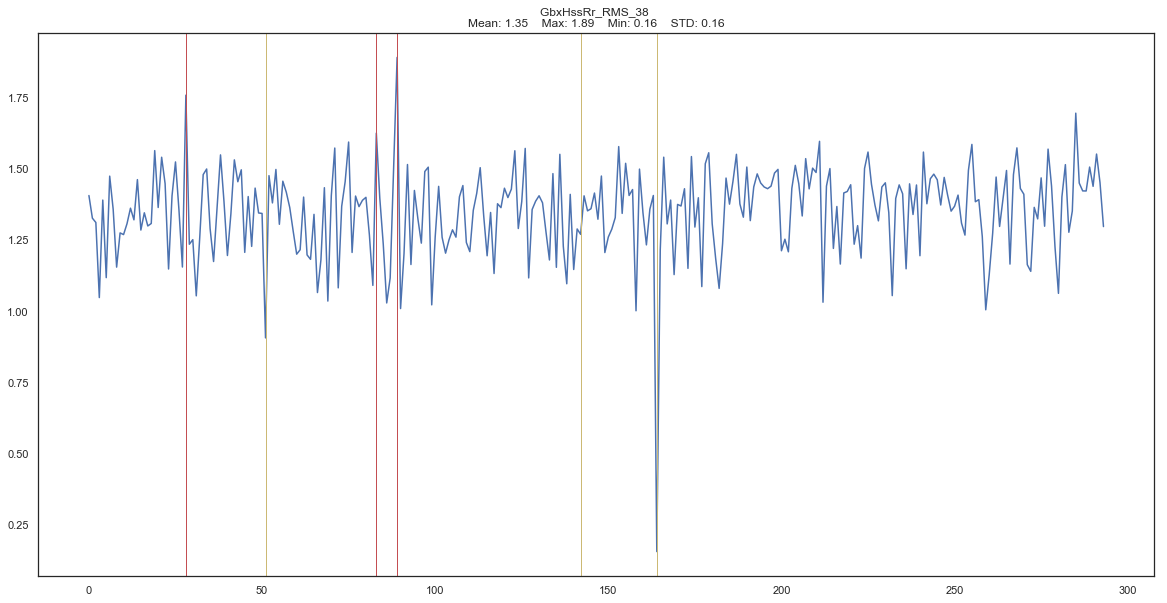

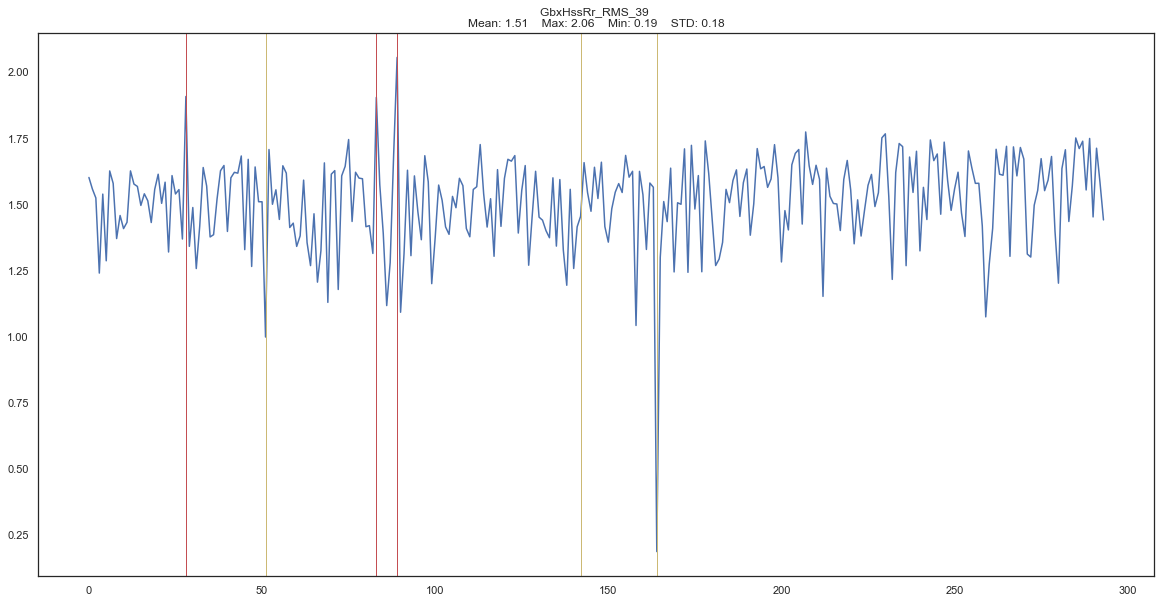

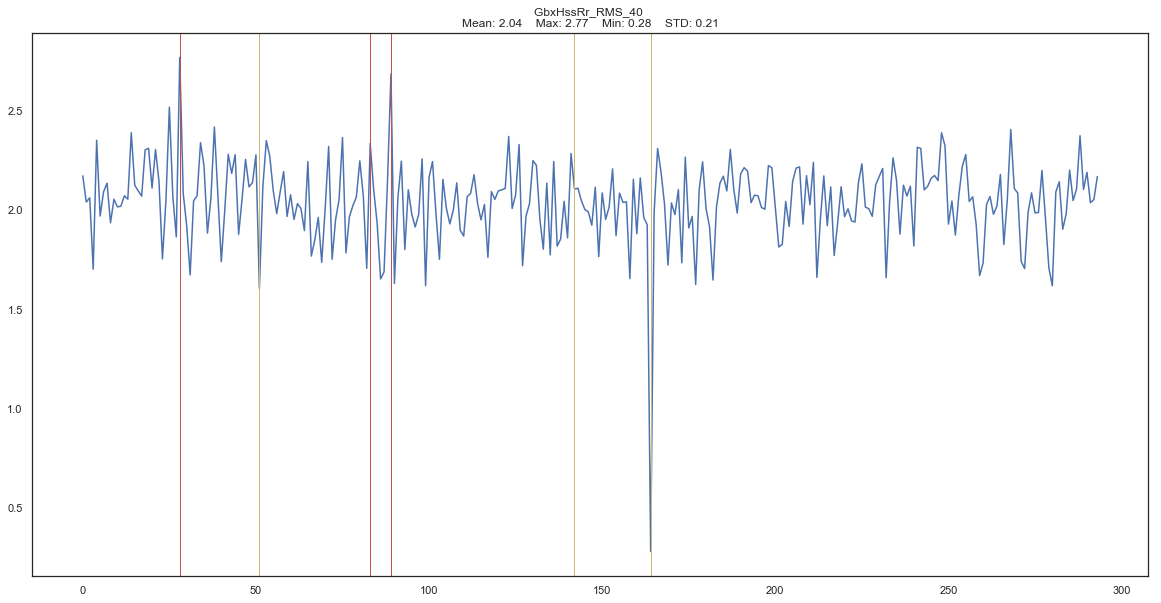

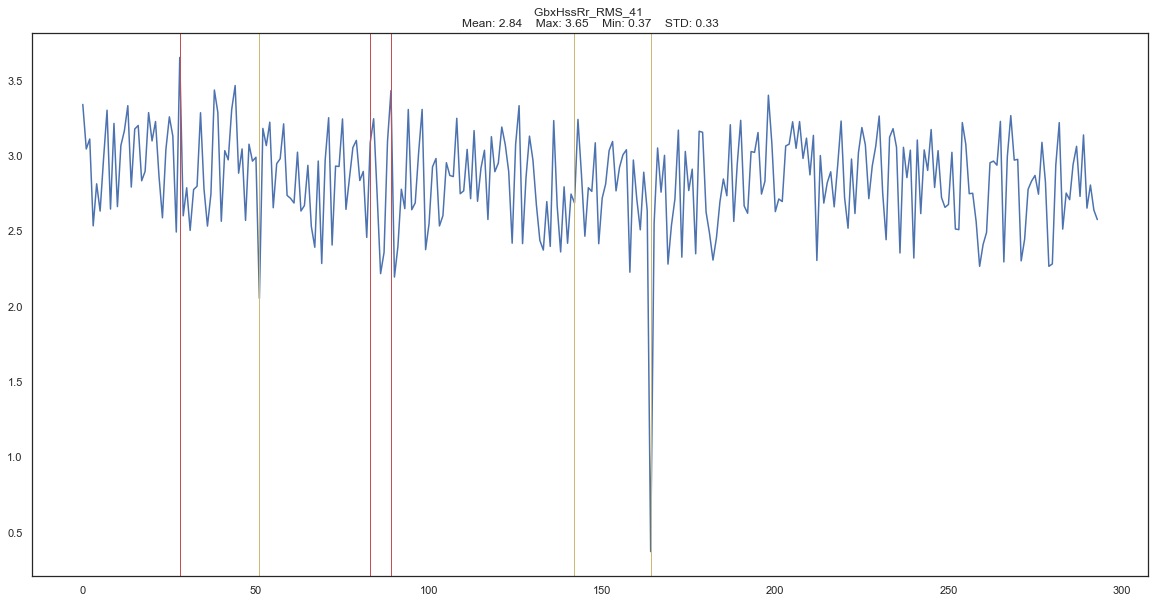

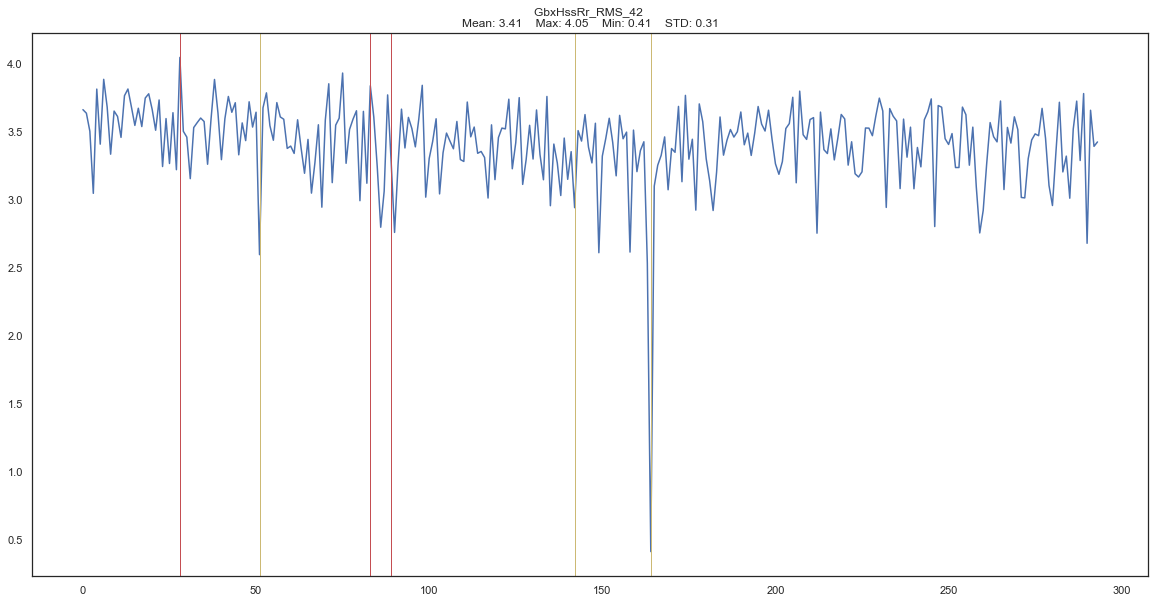

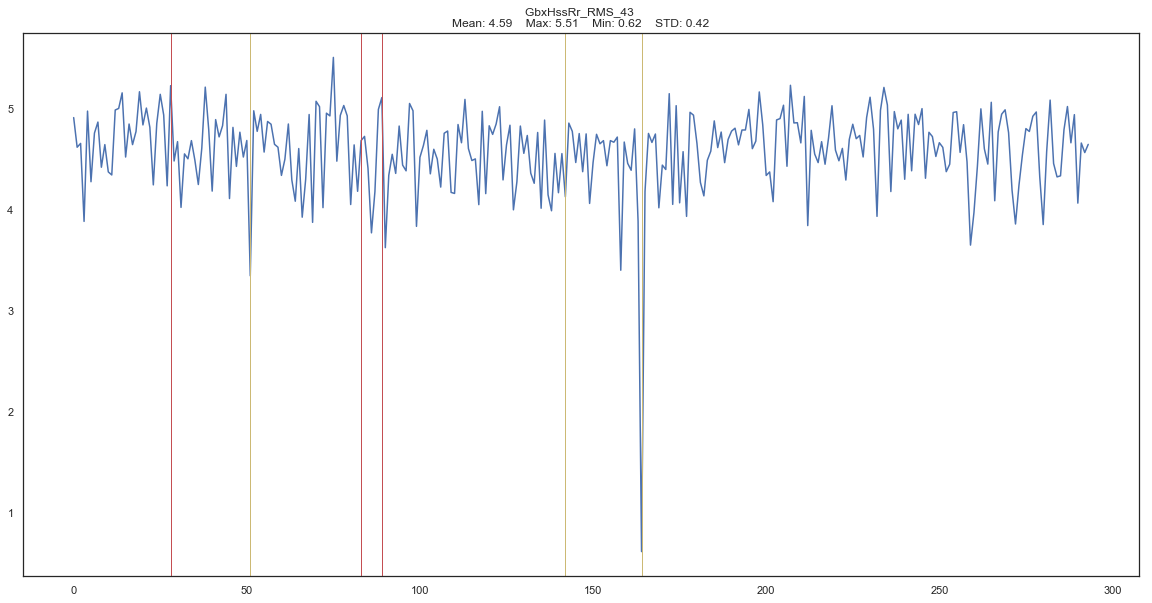

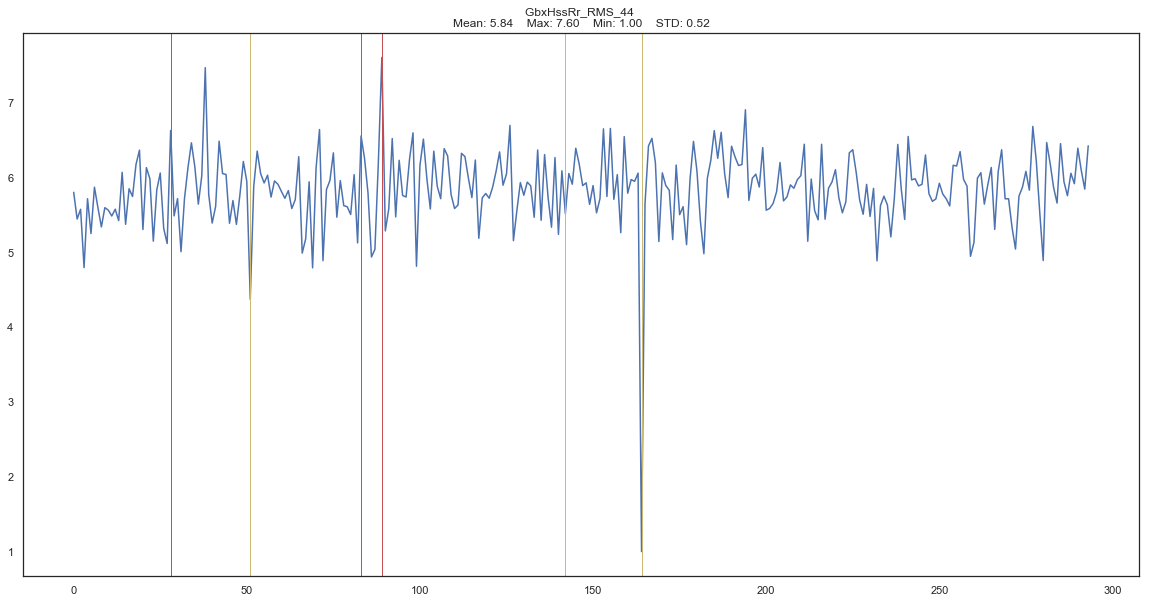

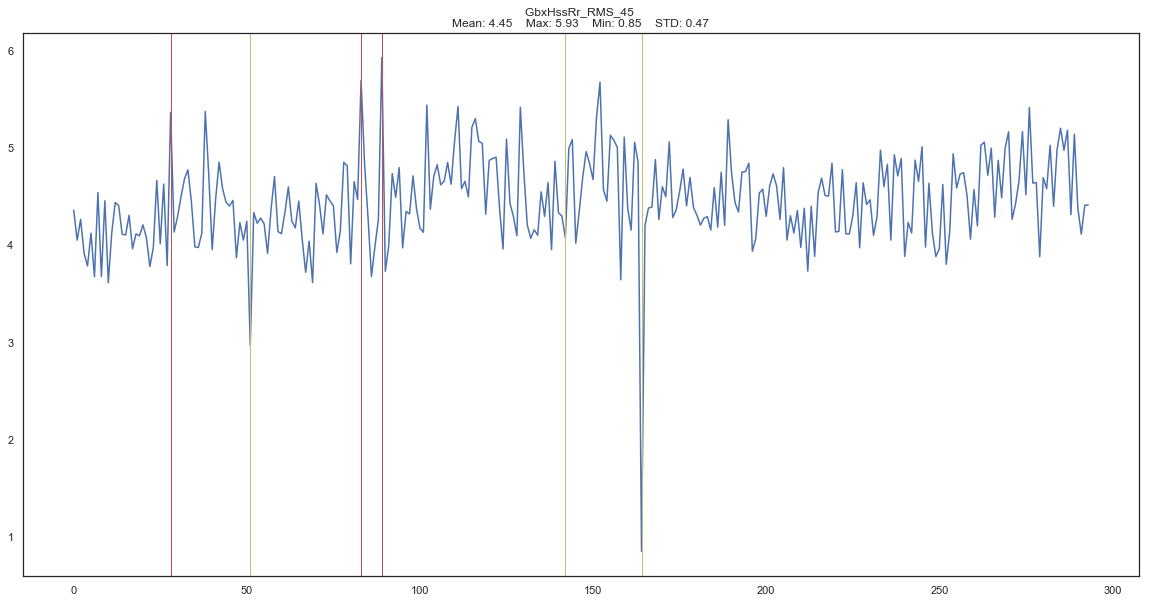

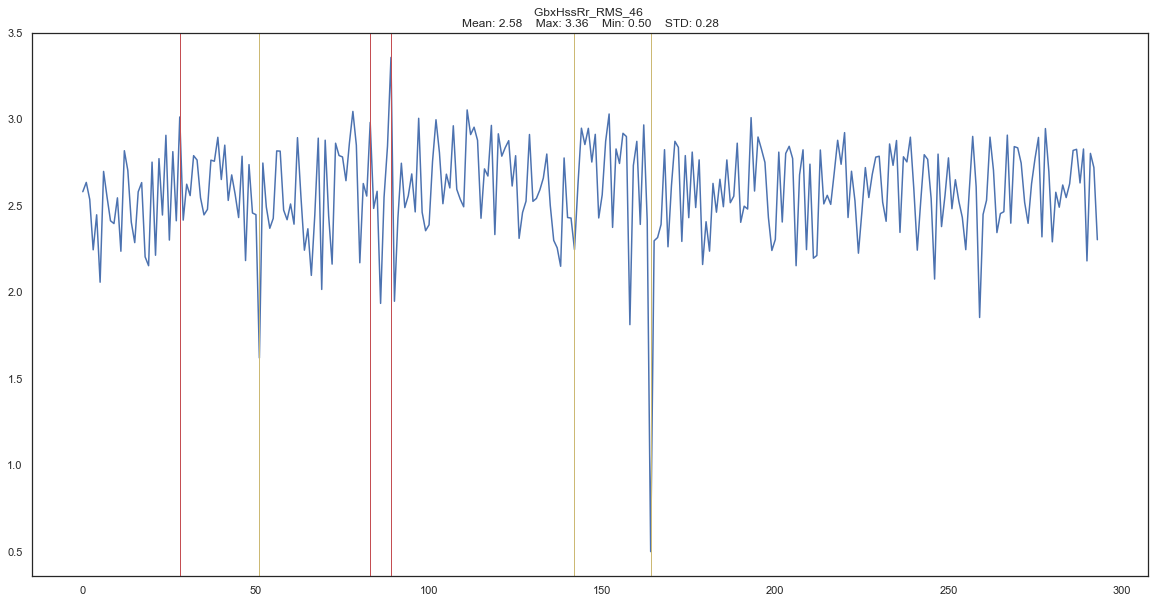

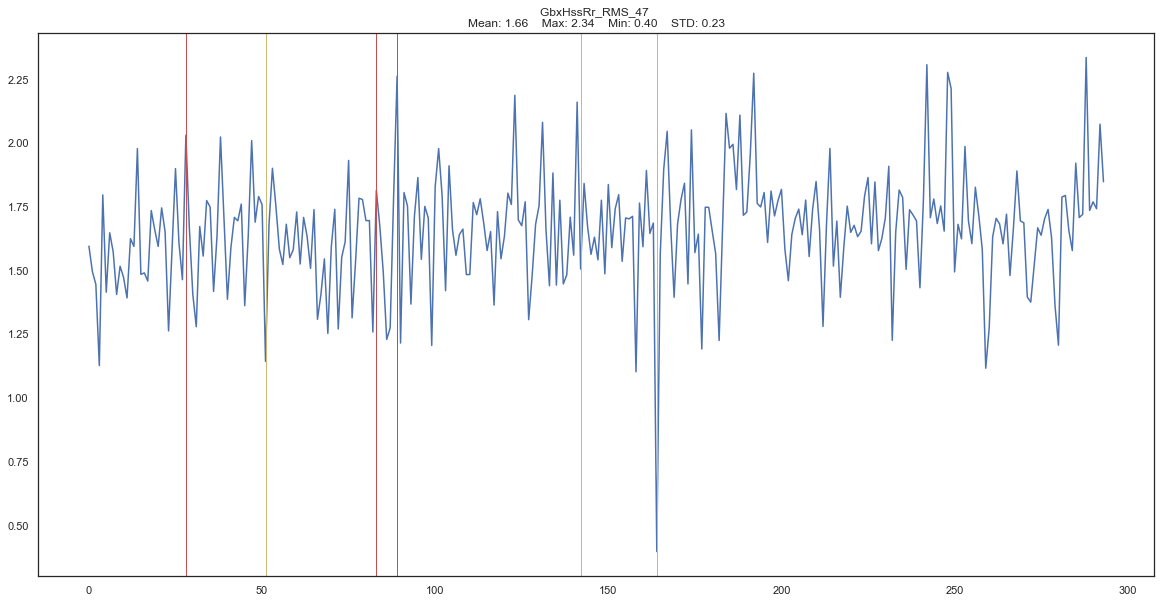

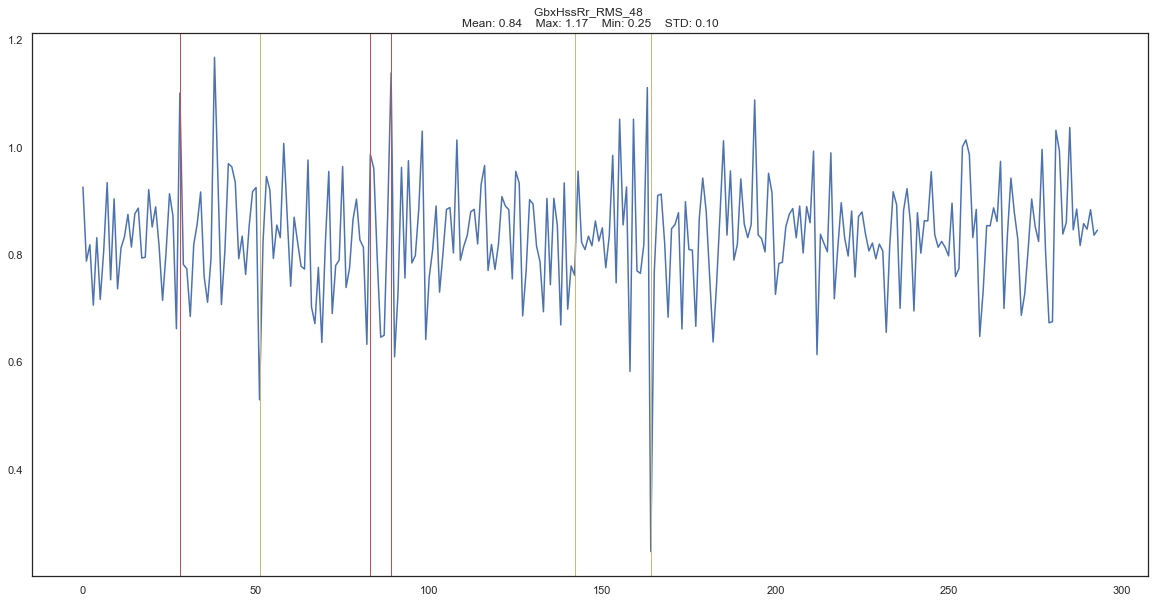

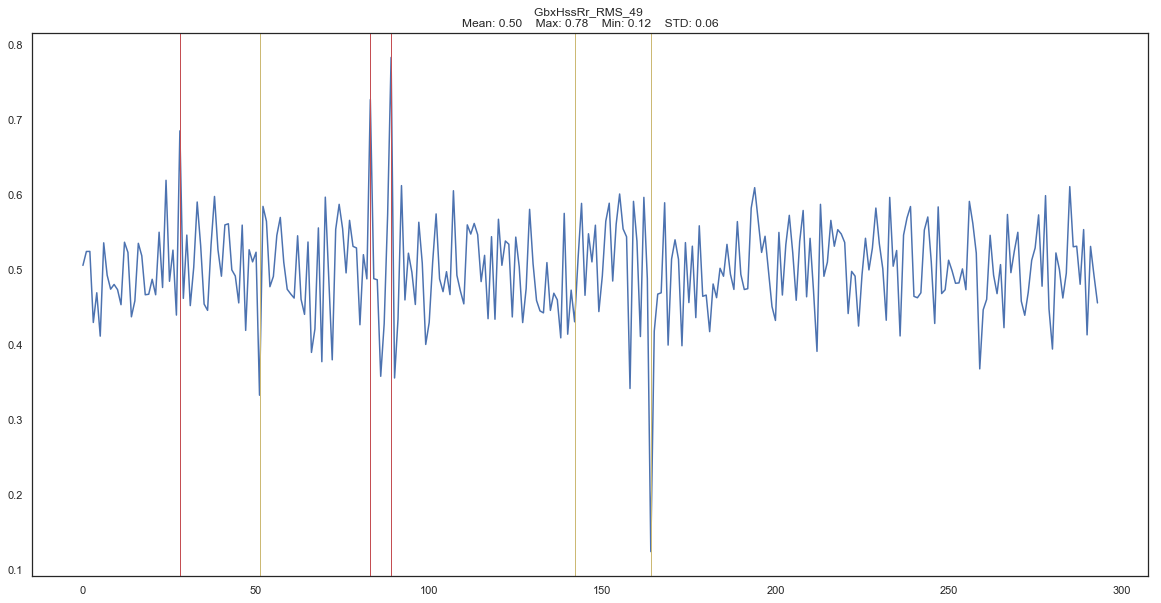

In [20]:
x=np.arange(len(data))
for i, name in enumerate(data.columns):
    plt.figure(figsize=(20,10))
    y = data.values[:,i]
    mean_val = np.mean(y)
    max_val = np.max(y)
    min_val = np.min(y)
    std_val = np.std(y)
    plt.title(f'{name} \nMean: {mean_val:.2f}    Max: {max_val:.2f}    Min: {min_val:.2f}    STD: {std_val:.2f}')
    plt.plot(x, y)
    plt.axvline(x=28,  c='r', linewidth=1)
    plt.axvline(x=83,  c='r', linewidth=1)
    plt.axvline(x=89,  c='r', linewidth=1)

    plt.axvline(x=51, c='y', linewidth=1)
    plt.axvline(x=142, c='y', linewidth=1)
    plt.axvline(x=164, c='y', linewidth=1)
    plt.show()

In [30]:
print(f"AvgPower value at test sample: {data.iloc[130]['AvgPower']}")
print('\nBlue lines')
print(f"AvgPower value at first high rot speed: {data.iloc[155]['AvgPower']}")
print(f"AvgPower value at second high rot speed: {data.iloc[199]['AvgPower']}")

AvgPower value at test sample: 3293.041015625

Blue lines
AvgPower value at first high rot speed: 3301.466796875
AvgPower value at second high rot speed: 2548.203613281


In [21]:
interesting_intervals = [28, 83, 89, 51, 142, 164]
val = []
for interval in interesting_intervals:
    val.append(float(f"{data.iloc[interval]['AvgPower']:.9f}"))

val

[3305.137207031,
 3233.803222656,
 3164.566650391,
 3293.766845703,
 2624.129638672,
 2684.011230469]

In [22]:
%autoreload
import build_dataset

41


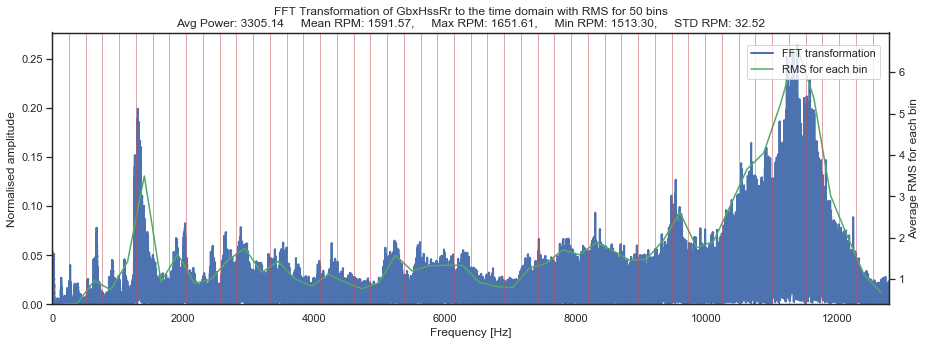

72


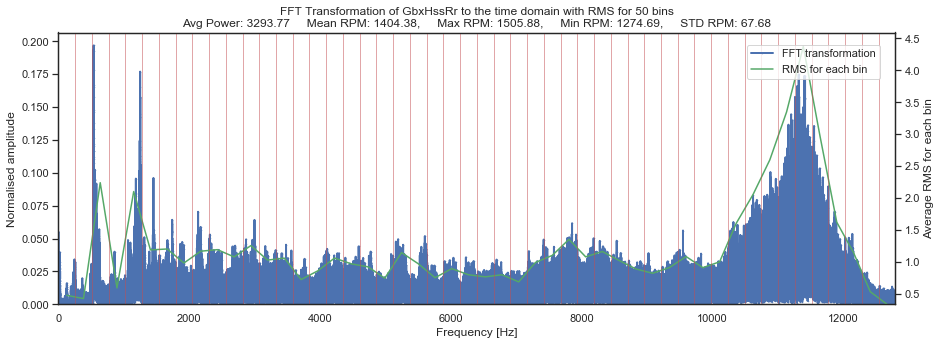

119


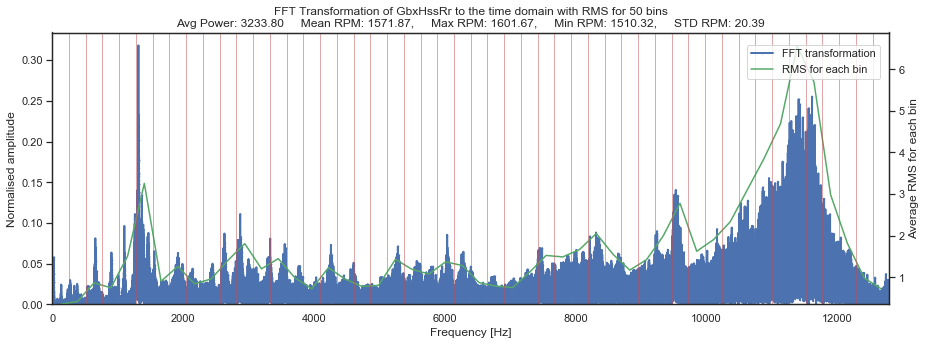

128


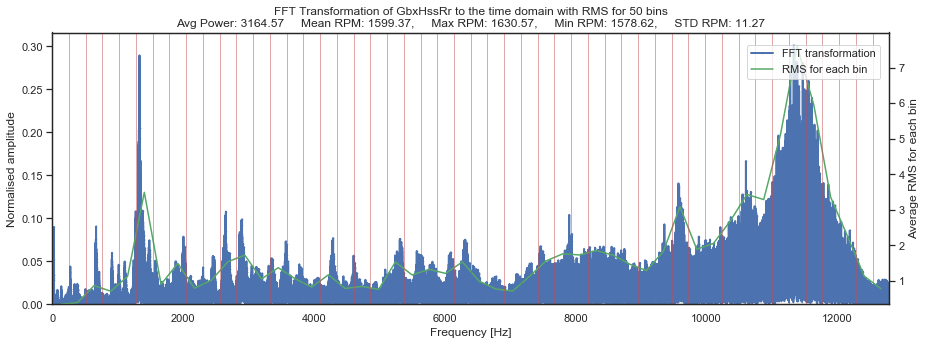

199


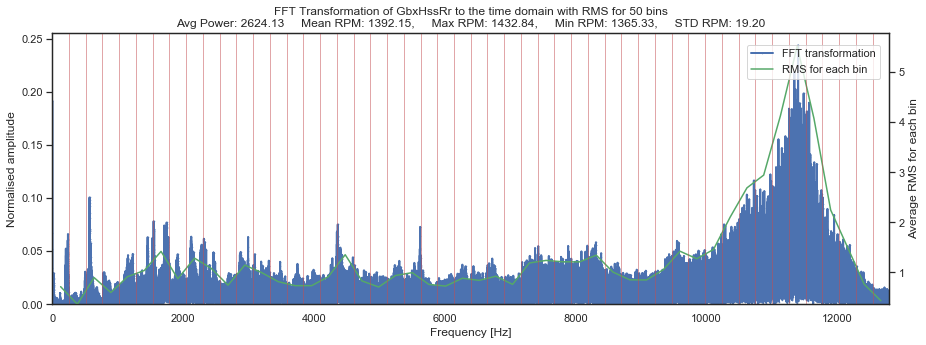

230


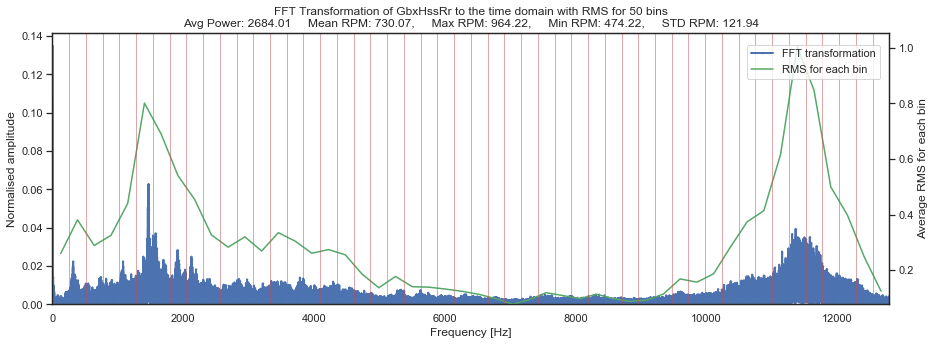

6 / 430 intervals added to dataframe


In [23]:
df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=2500,plot=True, bins=50, 
                                                         plot_vertical_lines=True,
                                                         avg_pwr_values = val)